# __Fire causes__
#### _Bureau of Fire Investigations_
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Emblem_of_the_New_York_City_Fire_Department.svg" width="120"/>
</div>

Introduction, better header, goal

#### __Structure:__

1. [__Preparing the dataset for the analysis__](#1.-Preparing-the-dataset-for-the-analysis)  
    1.1 [Basic information on the dataset](#1.1-Basic-information-on-the-dataset)  
    1.2 [Importing the necessary libraries](#1.2-Importing-the-necessary-libraries)  
    1.3 [Getting to know the dataset](#1.3-Getting-to-know-the-dataset)  
    1.4 [Early findings](#1.4-Early-findings)  
    1.5 [!!! Trimming move to helper function](#1.5-!!!-Trimming-move-to-helper-function)  
    1.6 [Unique values per column](#1.6-Unique-values-per-column)  
    1.7 [A deeper look at (potentially) numerical columns](#1.7-A-deeper-look-at-(potentially)-numerical-columns)  
    1.8 [First transformations: numeric columns cleaned](#1.8-First-transformations:-numeric-columns-cleaned)  
    1.9 [Column ID dropped](#1.9-Column-ID-dropped)  
    1.10 [datatypes corrected](#1.10-datatypes-corrected)  
    1.11 [Cleaning textual columns](#1.11-Cleaning-textual-columns)  
    1.12 [Cleaning the Incident type column](#1.12-Cleaning-the-Incident-type-column)  
    1.13 [Cleaning the Fire cause and Fire cause category columns](#1.13-Cleaning-the-Fire-cause-and-Fire-cause-category-columns)  
    1.14 [Looking for overlapping categories in the Fire cause category column](#1.14-Looking-for-overlapping-categories-in-the-Fire-cause-category-column)  
    1.15 [Splitting the Other category](#1.15-Splitting-the-Other-category)  
    1.16 [Creating the Incident type category column](#1.16-Creating-the-Incident-type-category-column)  
    1.17 [Adding date-related columns](#1.17-Adding-date-related-columns)  
    1.18 [!!! Checking the Year column](#1.18-!!!-Checking-the-Year-column)  
    1.19 [Adding ID](#1.19-Adding-ID)  
    1.20 [!!! Converting textual & numerical columns from object to category](#1.20-!!!-Converting-textual-&-numerical-columns-from-object-to-category)  
    1.21 [!!! Dropping 2024 & Incident time](#1.21-!!!-Dropping-2024-&-Incident-time)  
    1.22 [!!! Importing population](#1.22-!!!-Importing-population)  

2. [__Analyzing and plotting data__](#2.-Analyzing-/-plotting-data)  
    2.1 [Setting the style](#2.1-Setting-the-style)  
    2.2 [Time and period graphs](#2.2-Time-and-period-graphs)  
    2.3 [Location graphs](#2.3-Location-graphs)  
    2.4 [Causes graphs](#2.4-Causes-graphs)  

3. [__Machine learning__](#3.-Machine-learning)  
    3.1 [Regression](#3.1-Regression)  
        ㄴ [_Incendiary_](#Incendiary)  
        ㄴ [_Electrical_](#Electrical)  
        ㄴ [_Smoking_](#Smoking)  
        ㄴ [_Summary_](#Summary)  
    3.2 [Classification](#3.2-Classification)  
        ㄴ [_Trying ML_](#Trying-ML)  
        ㄴ [_Pivoting to frequency-based system_](#Evaluating-results)  

4. [__Conclusions / executive summary__](#4.-Conclusions-/-executive-summary)  

# __1. Getting to know the dataset__

## __1.1 Basic information on the dataset__

| Information    | Comment                                                               |
|----------------|-----------------------------------------------------------------------|
| _Name_         | Bureau of Fire Investigations - Fire Causes                           |
| _Description_  | Findings of investigations by the Bureau of Fire Investigations. This data lists the causes of fires found by the Bureau of Fire Investigations. Each record represents a fire related incident investigated by BFI. This dataset contains only closed and completed cases.                                        |
| _Source_       | [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz/about_data) |
| _Last updated_ | 9 May 2024                                                            |
| _Accessed_     | 3 June 2024                                                           |


## __1.2 Importing the necessary libraries__

In [12]:
# # For presenting purposes
# import warnings
# warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import sys
import os

sys.path.append(r'C:\Users\vanli\python_helper_functions')

from helper_functions import scrollable_output, dataset_check, uvalues_check, text_check, clean_text

In [15]:
scrollable_output(output_height = 500)
pd.set_option('display.max_columns', None)

## __1.3 Importing the dataset__

In [16]:
# Set the path to the file
path = 'Input/Bureau_of_Fire_Investigations_-_Fire_Causes_20240603.csv'

In [17]:
df = pd.read_csv(path)
df.head()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


Let’s update the column names:

In [18]:
# Set the new column names
colnames = ['Year', 'ID', 'Incident time', 'Borough', 'Fire battalion', 'Community district', 
            'Police precinct', 'Incident type', 'Fire cause', 'Fire cause category']

In [19]:
# Set the new column names
df = pd.read_csv(path, names = colnames, header = 0)
df.head()

,Year,ID,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


## __1.4 Early findings__

I have a couple of <i>helper functions</i> that save me time. One of those functions is <code>dataset_check()</code>. Let’s run it:

In [20]:
# Perform the basic check
dataset_check(
    df, 
    shape_check = True,
    dup_check = True,
    dtypes_check = True,
    missing_values_check = True,
    unique_values_check = True,
    unique_values_percentage_check = False,
    stats_check = False,
    corr_check = False
)

COLUMNS:
10

ROWS:
53 741

DUPLICATE ROWS:
0

DATATYPES:
Year                    int64
ID                      int64
Incident time          object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

MISSING VALUES:
Borough                 260
Fire battalion         7658
Community district      338
Police precinct         344
Incident type           827
Fire cause               73
Fire cause category      61
dtype: int64

MISSING VALUES IN %:
Borough                 0.48%
Fire battalion         14.25%
Community district      0.63%
Police precinct         0.64%
Incident type           1.54%
Fire cause              0.14%
Fire cause category     0.11%
dtype: object

UNIQUE VALUES:
Year                       9
ID                      9543
Incident time          52343
Borough                    6
Fire battalion           

Let’s check what we have:
- <b>Duplicates.</b> There are no duplicate rows.
- <b>Datatypes.</b> Columns <code>Incident time</code>, <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> are seen as <code>object</code> columns even though they contain dates or numbers. This should be investigated.
- <b>Missing values.</b> We have relatively many missing values in column <code>Incident type</code> and we have _a lot_ of missing values in <code>Fire battalion</code>. This is very strange — how come _so many_ incidents do _not_ have a fire battalion? Does this mean that some fire incidents in the city were not reported/were not handled by the Fire Department? Let’s see if it will be relevant for our analysis. 
- <b>Unique values.</b> We have 53 741 rows, but the <code>ID</code> column has 9 543 unique values. That means that the column is of no use and can be dropped. Also, New York has 5 boroughs (see image below) and not 6. This should also be investigated.

<div>
<img src="https://www.loumovesyou.com/wp-content/uploads/2022/11/FiveBoroughs-01.jpg" width="500"/>
</div>

# __2. Preparing the dataset for the analysis__

## __2.1 Trimming and cleaning textual columns__

It won’t make any harm to <i>trim</i> and <i>clean</i> textual columns of unnecessary spaces and symbols. For that I have my <code>clean_text()</code> <i>helper function</i>:

In [21]:
# Select textual columns
clean_text_columns = ['Incident time', 'Borough', 'Fire battalion', 'Community district', 
            'Police precinct', 'Incident type', 'Fire cause', 'Fire cause category']

clean_text(df, clean_text_columns)

,Year,ID,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


## __2.2 Unique values per column__

Let’s find out what are the unique values per column. For that I have my <code>uvalues_check()</code> <i>helper function</i>.

In [22]:
# Get columns names
df.columns

Index(['Year', 'ID', 'Incident time', 'Borough', 'Fire battalion',
       'Community district', 'Police precinct', 'Incident type', 'Fire cause',
       'Fire cause category'],
      dtype='object')

In [23]:
uvalues_check(df, ['Year', 'Borough', 'Fire battalion', 'Community district',
                   'Police precinct', 'Incident type', 'Fire cause',
                   'Fire cause category'])

UNIQUE VALUES

YEAR
[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 

BOROUGH
['Bronx', 'Brooklyn', 'Manhattan', 'nan', 'Outside of NYC', 'Queens', 'Staten Island'] 

FIRE BATTALION
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '26', '27', '28', '3', '31', '32', '33', '35', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '57', '58', '6', '7', '8', '9', 'BC', 'CD', 'MR', 'nan', 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '3', '4', '5', '6', '7', '8', '9', 'nan', 'Out of NYC'] 

POLICE PRECINCT
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '12', '120', '121', '122', '123', '13', '14', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '28', '30', '32', '33', '34', '40', '41', '42', '43', '44', '45'

Notes:
- <b>Year.</b> The dataset has data for 2016–2024. Since the last update date was on 9 May 2024 that means that the 2024 year is not complete. I’ll drop this year for simplicity and keep only 2016–2023.
- <b>Borough.</b> Let’s check how many values are there for <code>Outside of NYC</code>. If there are few, we’ll drop these incidents, since we’re interested in New York.
- <b>Numeric columns.</b> Columns that you’d expect to see numbers (<code>Fire battalion</code>, <code>Community district</code>, <code>Police precinct</code>) contain textual values.
- <b>Fire cause category.</b> Values like <code>Cooking</code> and <code>Cooking Carelessness</code> look similar. Typo, grouping opportunity?
- <b><code>nan</code>s.</b> To be investigated.

## __2.3 Dropping the 2024 year__

As said, we’ll focus on <i>full years</i> and will drop 2024:

In [24]:
max(df['Year'])

2024

In [25]:
df = df[df['Year'] != 2024]
max(df['Year'])

2023

## __2.4 Cleaning the <code>Borough</code> column__

I’ll make a pivot to get see what is the distribution of boroughs:

In [26]:
nan_values = 'Unknown'
df['Borough'] = df['Borough'].replace({np.nan: nan_values, '': nan_values, 'nan': nan_values})

pvt_borough = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Borough',
    aggfunc = 'count',
)

pvt_borough['Percentage'] = (pvt_borough['ID'] / pvt_borough['ID'].sum()) * 100
pvt_borough = pvt_borough.sort_values(by=['Percentage'], ascending=False)

pvt_borough['Percentage'] = pvt_borough['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_borough.index = pvt_borough.index.to_series().replace({np.nan: nan_values, 'nan': nan_values})

pvt_borough

,ID,Percentage
Borough,,
Brooklyn,15442,29.44%
Bronx,11947,22.78%
Queens,11844,22.58%
Manhattan,10175,19.40%
Staten Island,2708,5.16%
Unknown,260,0.50%
Outside of NYC,77,0.15%


There were 77 incidents <code>Outside of NYC</code> and 260 incidents with missing data. Since (a) the numbers are relatively small (0,65% in total) and (b) we’ll need borough-specific information for our further analysis, rows with these values will be dropped before we proceed.

In [27]:
df = df[df['Borough'].notna() & ~df['Borough'].isin([nan_values, 'Outside of NYC'])]
df['Borough'].value_counts()

Brooklyn         15442
Bronx            11947
Queens           11844
Manhattan        10175
Staten Island     2708
Name: Borough, dtype: int64

## __2.5 Investigating and cleaning numerical columns__

Let’s check columns <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> for textual values using my <code>text_check()</code> <i>helper function</i>. I’ll then create pivots like the one for the <code>Borough</code> column.

In [28]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
['BC', 'CD', 'MR', 'nan', 'OP', 'SC', 'TR'] 

COMMUNITY DISTRICT
['nan', 'Out of NYC'] 

POLICE PRECINCT
['5th', '7th', 'HWY2', 'HY2', 'mtn', 'MTS', 'nan', 'NJ', 'PAPD', 'PSA2', 'PSA7'] 



<code>Fire battalion</code>:

In [29]:
nan_values = 'Unknown'
df['Fire battalion'] = df['Fire battalion'].replace({np.nan: nan_values, '': nan_values, 'nan': nan_values})

pvt_firebat = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Fire battalion',
    aggfunc = 'count',
)

pvt_firebat['Percentage'] = (pvt_firebat['ID'] / pvt_firebat['ID'].sum()) * 100
pvt_firebat = pvt_firebat.sort_values(by=['Percentage'], ascending=False)

pvt_firebat['Percentage'] = pvt_firebat['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_firebat.index = pvt_firebat.index.to_series().replace({np.nan: nan_values, 'nan': nan_values})

pvt_firebat

,ID,Percentage
Fire battalion,,
Unknown,6848,13.14%
50,1631,3.13%
54,1477,2.83%
15,1404,2.69%
46,1391,2.67%
18,1341,2.57%
19,1332,2.56%
44,1280,2.46%
38,1213,2.33%


<code>Community district</code>:

In [30]:
nan_values = 'Unknown'
df['Community district'] = df['Community district'].replace({np.nan: nan_values, '': nan_values, 'nan': nan_values})

pvt_comdist = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Community district',
    aggfunc = 'count',
)

pvt_comdist['Percentage'] = (pvt_comdist['ID'] / pvt_comdist['ID'].sum()) * 100
pvt_comdist = pvt_comdist.sort_values(by=['Percentage'], ascending=False)

pvt_comdist['Percentage'] = pvt_comdist['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_comdist.index = pvt_comdist.index.to_series().replace({np.nan: nan_values, 'nan': nan_values})

pvt_comdist

,ID,Percentage
Community district,,
1,5558,10.66%
12,5009,9.61%
3,4752,9.12%
5,4542,8.72%
9,3413,6.55%
2,3357,6.44%
4,3315,6.36%
7,3148,6.04%
10,3075,5.90%


<code>Police precinct</code>:

In [31]:
nan_values = 'Unknown'
df['Police precinct'] = df['Police precinct'].replace({np.nan: nan_values, '': nan_values, 'nan': nan_values})

pvt_precinct = pd.pivot_table(
    df,
    values = 'ID',
    index = 'Police precinct',
    aggfunc = 'count',
)

pvt_precinct['Percentage'] = (pvt_precinct['ID'] / pvt_precinct['ID'].sum()) * 100
pvt_precinct = pvt_precinct.sort_values(by=['Percentage'], ascending=False)

pvt_precinct['Percentage'] = pvt_precinct['Percentage'].apply(lambda x: f'{x:.2f}%')
pvt_precinct.index = pvt_precinct.index.to_series().replace({np.nan: nan_values, 'nan': nan_values})

pvt_precinct.tail(25)

,ID,Percentage
Police precinct,,
17,354,0.68%
78,349,0.67%
26,349,0.67%
30,345,0.66%
100,344,0.66%
76,341,0.65%
20,338,0.65%
6,309,0.59%
Unknown,200,0.38%


After performing the check we can conclude this:
- <b>Fire battalion.</b> As we’ve already seen, there’re many rows without a battalion. I will replace them with a <code>999</code>. Battalions that have an occurrence of less than 320 look suspicious. They are probably outliers or errors. I will replace them with <code>998</code>.
- <b>Community district.</b> Missing values will be replaced with <code>999</code>. <code>Out of NYC</code> will be replaced with <code>998</code>.
- <b>Police precinct.</b> Missing values will be replaced with <code>999</code>. <code>5th</code> and <code>7th</code> are clearly typos. This should be corrected by removing <code>th</code>. Similar to <code>Fire battalion</code> precincts that have an occurrence of less than 309 look suspicious. I will replace them with <code>998</code>.

<table>
    <thead>
        <tr><th>Column</th><th>This value</th><th>Will be changed to</th></tr>
    </thead>
    <tbody>
        <tr><td>Fire battalion</td><td>NaN → Unknown</td><td>999</td></tr>
        <tr><td>Fire battalion</td><td><i>Occurrence of less than 320</i></td><td>998</td></tr>
        <tr><td>Community district</td><td>NaN → Unknown</td><td>999</td></tr>
        <tr><td>Community district</td><td>Out of NYC</td><td>998</td></tr>
        <tr><td>Police precinct</td><td>5th</td><td>5</td></tr>
        <tr><td>Police precinct</td><td>7th</td><td>7</td></tr>
        <tr><td>Police precinct</td><td>NaN → Unknown</td><td>999</td></tr>
        <tr><td>Police precinct</td><td><i>Occurrence of less than 309</i></td><td>998</td></tr>
    </tbody>
</table>

In [32]:
# Fire battalion
# Replace 'NaN' and 'Unknown' with '999'
df['Fire battalion'] = df['Fire battalion'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 320 with '998'
replace_firebat = df['Fire battalion'].value_counts()
replace_firebat = replace_firebat[replace_firebat < 327].index
df['Fire battalion'] = df['Fire battalion'].replace(replace_firebat, '998')

# Community district
# Replace 'NaN' and 'Unknown' with '999' and 'Out of NYC' with '998'
df['Community district'] = df['Community district'].fillna('999').replace({'Unknown': '999', 'Out of NYC': '998'})

# Police precinct
# Remove 'th' from '5th' and '7th'
df['Police precinct'] = df['Police precinct'].str.replace('th', '')

# Replace 'NaN' and 'Unknown' with '999'
df['Police precinct'] = df['Police precinct'].fillna('999').replace('Unknown', '999')

# Replace values with occurrence of less than 309 with '998'
replace_precinct = df['Police precinct'].value_counts()
replace_precinct = replace_precinct[replace_precinct < 200].index
df['Police precinct'] = df['Police precinct'].replace(replace_precinct, '998')

In [33]:
text_check(df, ['Fire battalion', 'Community district', 'Police precinct'])

NON-NUMERIC VALUES

FIRE BATTALION
Numeric values only

COMMUNITY DISTRICT
Numeric values only

POLICE PRECINCT
Numeric values only



Great! We’re done with <code>Borough</code>, <code>Fire battalion</code>, <code>Community district</code>, <code>Police precinct</code>. Before we move on to <code>Incident type</code>, <code>Fire cause</code>, and <code>Fire cause category</code> let’s perform these transformations:
1. Drop the <code>ID</code> column;
2. Assign the correct data type to the <code>Year</code>, <code>Incident time</code>, <code>Fire battalion</code>, <code>Community district</code>, and <code>Police precinct</code> columns.

## __2.6 Column <code>ID</code> dropped__

In [34]:
df.drop(['ID'], axis = 1, inplace = True)
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


## __2.7 <i>datatypes</i> corrected__

In [35]:
df.dtypes

Year                    int64
Incident time          object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

In [36]:
# Converting to UInt16
df['Year'] = df['Year'].astype('UInt16')

# Converting to category
colnames = ['Borough', 'Fire battalion', 'Community district', 'Police precinct']
df[colnames] = df[colnames].astype('category')

# Converting to datetime
df['Incident time'] = pd.to_datetime(df['Incident time'])

In [37]:
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [38]:
df.dtypes

Year                           UInt16
Incident time          datetime64[ns]
Borough                      category
Fire battalion               category
Community district           category
Police precinct              category
Incident type                  object
Fire cause                     object
Fire cause category            object
dtype: object

Looks good! We are <i>not completely</i> done with the <code>Incident time</code> column, but for the time being let’s leave it as it is and move on to the remaining columns: <code>Incident type</code>, <code>Fire cause</code>, and <code>Fire cause category</code>.

## __2.8 Cleaning the <code>Incident type</code> column__

In [39]:
uvalues_check(df, ['Incident type'])

UNIQUE VALUES

INCIDENT TYPE
['Aircraft', 'Boat', 'Brush', 'Burn Notification', 'Burn Notification (Albany)', 'Commercial Structure', 'Construction Trailer', 'Construction Vehicle', 'Garage/Shed', 'Government Structure', 'Group Home', 'Hospital', 'Hotel', 'Manhole', 'MD Residential Structure', 'MFA', 'Miscellaneous', 'nan', 'No Fire', 'Nursing Home', 'Other', 'Outside Rubbish', 'PD Residential Structure', 'Possible Single Room Occupancy', 'Public Hallway', 'Public Structure', 'Religious Structure', 'School', 'Sidewalk', 'Street', 'Threat to Burn', 'Transformer', 'Transit', 'Vehicle'] 



We need to do something with the missing <code>nan</code> values. Let’s see what are the values in the <code>Fire cause</code> when <code>Incident type</code> is <code>NaN</code> or <code>nan</code>:

In [40]:
df[df['Incident type'].isna() | (df['Incident type'] == 'nan')]['Fire cause'].value_counts()

Preliminary Investigation Only    762
nan                                 4
Name: Fire cause, dtype: int64

Most of the values are <code>Preliminary Investigation Only</code>. What about the other 4? Looks like they are also <code>NaN</code> in <code>Fire cause</code>.

In [41]:
df[(df['Incident type'].isna() | (df['Incident type'] == 'nan')) & 
   (df['Fire cause'].isna() | (df['Fire cause'] == 'nan'))]

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
14718,2018,2017-11-27 06:48:00,Bronx,3,10,45,nan,nan,nan
15555,2018,2018-01-05 02:37:00,Bronx,14,1,40,nan,nan,nan
28939,2019,2019-12-14 09:35:37,Queens,53,11,111,nan,nan,nan
28942,2019,2019-12-14 13:00:35,Manhattan,999,11,23,nan,nan,nan


In [42]:
# Replace these 4 'nan' with 'Unknown'
df.loc[(df['Incident type'].isna() | (df['Incident type'] == 'nan')) & 
       (df['Fire cause'].isna() | (df['Fire cause'] == 'nan')), 'Incident type'] = 'Unknown'

# Replace the remaining 'nan' values with 'Under investigation'
df['Incident type'] = df['Incident type'].replace({'nan': 'Under investigation'}).fillna('Under investigation')

In [43]:
df['Incident type'].value_counts()

MD Residential Structure          20172
Vehicle                            9486
PD Residential Structure           6629
Commercial Structure               3257
Other                              2331
Outside Rubbish                    2208
Burn Notification                  1363
Burn Notification (Albany)         1280
MFA                                 820
Under investigation                 762
No Fire                             736
Garage/Shed                         572
School                              315
Transit                             263
Brush                               238
Religious Structure                 178
Government Structure                172
Manhole                             171
Group Home                          160
Hotel                               157
Hospital                            149
Public Structure                    118
Sidewalk                            109
Street                               81
Public Hallway                       68


We’re done with the <code>Incident type</code> column.

## __2.9 Cleaning the <code>Fire cause</code> and <code>Fire cause category</code> columns__

In [44]:
uvalues_check(df, ['Fire cause', 'Fire cause category'])

UNIQUE VALUES

FIRE CAUSE
['Aerosol Can', 'Albany Burn Notif. / Pending Investigation', 'Albany Burn Notif. Related to a Previous BFI Inv.', 'Albany Burn Notif. Unrelated to a Fire/Explosion', 'Appliance Cord', 'Arc Welding', 'Ballast', 'Barbecue - Propane', 'Barbecue - Wood/Charcoal', 'Brands', 'Cable/Satellite Equipment', 'Candle', 'Carbon Monoxide Incident', 'Child Playing w/ Other Open Flame', 'Child Playing w/Matches/Lighter', 'Chimney/Flues', 'Clothes Dryer', 'Clothes Dryer - Electric', 'Clothes Dryer - Natural Gas', 'Clothes Washer', 'Coffee Pot', 'Computer Component(s)', 'Cooking Fire Extending to Clothing or Combustibles', 'Dishwasher', 'Electrical Wiring', 'Electrocution - Electrical Burns to Person', 'Exothermic Chemical Reaction', 'Extension Cord', 'Feeder Cable', 'Fireplace', 'Fireworks Related', 'Food on the Stove', 'Fraudulent Placard Investigation', 'Fuse/Circuit Breaker Panel', 'Hard Wire Outlet', 'Headquarters Investigation', 'Heat from an Iron', 'Heat from Light Bulb

When we’ve performed the basic check the <code>Fire cause</code> column had 73 missing values and the <code>Fire cause category</code> had 61. How come? Shouldn’t the <code>Fire cause category</code> be based on the <code>Fire cause</code> column? Let’s take a look at these incidents.

In [45]:
df[(df['Fire cause'].isna() | (df['Fire cause'] == 'nan')) & 
   ~(df['Fire cause category'].isna() | (df['Fire cause category'] == 'nan'))].head(20)

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
7302,2016,2016-11-30 09:54:00,Queens,52,7,109,Vehicle,nan,Motors
8567,2017,2017-01-29 12:07:09,Manhattan,7,5,14,Commercial Structure,nan,Other
8570,2017,2017-01-29 15:15:29,Queens,50,8,107,No Fire,nan,No Fire
8778,2017,2017-02-07 18:00:00,Brooklyn,43,13,60,Other,nan,Other
8848,2017,2017-02-10 23:09:33,Queens,999,9,102,MD Residential Structure,nan,Cooking Carelessness
9944,2017,2017-03-28 18:00:00,Brooklyn,42,11,62,Other,nan,Other
10232,2017,2017-04-11 06:31:41,Staten Island,21,1,122,No Fire,nan,No Fire
10382,2017,2017-04-17 22:32:00,Manhattan,16,9,30,MD Residential Structure,nan,Hot Objects
10389,2017,2017-04-18 04:47:14,Queens,28,5,104,Commercial Structure,nan,Appliances
10677,2017,2017-05-02 01:21:00,Manhattan,4,3,5,Commercial Structure,nan,Smoking


It looks like an error — perhaps the <code>Fire cause</code> field was overlooked when the incident form was filled in.
<br><br>
We can fill it in based on the other values in <code>Fire cause</code> that fall under the corresponding <code>Fire cause category</code>. Of course, under the condition that each category has only one fire cause.

In [46]:
missing_fcc_unique = df[(df['Fire cause'].isna() | (df['Fire cause'] == 'nan')) & 
                        ~(df['Fire cause category'].isna() | (df['Fire cause category'] == 'nan'))]['Fire cause category'].unique()
print(missing_fcc_unique)

['Motors' 'Other' 'No Fire' 'Cooking Carelessness' 'Hot Objects'
 'Appliances' 'Smoking' 'Incendiary']


In [47]:
unique_causes_list = [
    category for category in missing_fcc_unique
    if len(df[df['Fire cause category'] == category]['Fire cause']
           .replace('nan', np.nan).dropna().unique()) == 1
]

unique_causes_list

['Smoking']

In [48]:
df[df['Fire cause category'] == 'Smoking']['Fire cause'].replace('nan', np.nan).dropna().unique()

array(['Smoking (Cigarette/Cigar)'], dtype=object)

Looks like only 1 category has 1 description. For <code>Smoking</code> it is <code>Smoking (Cigarette/Cigar)</code>. I will replace <code>Smoking</code> rows with the <code>Smoking (Cigarette/Cigar)</code> value while other missing rows in <code>Fire cause</code> will be replaced with <code>Unknown</code>.
<br><br>
The missing values in <code>Fire cause category</code> will also be replaced with <code>Unknown</code>.

In [49]:
# Fire cause: Replace 'nan' where category is 'Smoking'
df.loc[
    (df['Fire cause'].isna() | (df['Fire cause'] == 'nan')) & (df['Fire cause category'] == 'Smoking'),
    'Fire cause'
] = 'Smoking (Cigarette/Cigar)'

# Replace remaining 'nan' in 'Fire cause' with 'Unknown'
df['Fire cause'] = df['Fire cause'].replace('nan', np.nan).fillna('Unknown')

# Replace 'nan' in 'Fire cause category' with 'Unknown'
df['Fire cause category'] = df['Fire cause category'].replace('nan', np.nan).fillna('Unknown')

In [50]:
uvalues_check(df, ['Incident type', 'Fire cause', 'Fire cause category'])

UNIQUE VALUES

INCIDENT TYPE
['Aircraft', 'Boat', 'Brush', 'Burn Notification', 'Burn Notification (Albany)', 'Commercial Structure', 'Construction Trailer', 'Construction Vehicle', 'Garage/Shed', 'Government Structure', 'Group Home', 'Hospital', 'Hotel', 'Manhole', 'MD Residential Structure', 'MFA', 'Miscellaneous', 'No Fire', 'Nursing Home', 'Other', 'Outside Rubbish', 'PD Residential Structure', 'Possible Single Room Occupancy', 'Public Hallway', 'Public Structure', 'Religious Structure', 'School', 'Sidewalk', 'Street', 'Threat to Burn', 'Transformer', 'Transit', 'Under investigation', 'Unknown', 'Vehicle'] 

FIRE CAUSE
['Aerosol Can', 'Albany Burn Notif. / Pending Investigation', 'Albany Burn Notif. Related to a Previous BFI Inv.', 'Albany Burn Notif. Unrelated to a Fire/Explosion', 'Appliance Cord', 'Arc Welding', 'Ballast', 'Barbecue - Propane', 'Barbecue - Wood/Charcoal', 'Brands', 'Cable/Satellite Equipment', 'Candle', 'Carbon Monoxide Incident', 'Child Playing w/ Other Open Fl

## __2.10 Looking for overlapping categories in the <code>Fire cause category</code> column__

In [51]:
len(df['Fire cause'].unique())

135

Since the missing values became <code>Unknown</code> the <code>Fire cause</code> column has now 135 unique values.
<br><br>
These values are categorized in the <code>Fire cause category</code> column.

In [52]:
df['Fire cause category'].value_counts()

Other                   17545
Incendiary              10522
Electrical               7857
Smoking                  4987
Open Flame               2321
Cooking Carelessness     2128
No Fire                  2084
Hot Objects              1830
Appliances               1016
Motors                    578
Heaters                   434
Ignitable                 333
Natural Sources           268
Electrical Devices         83
Cooking                    74
Unknown                    56
Name: Fire cause category, dtype: int64

Some of the categories like <code>Cooking</code> and <code>Cooking Carelessness</code> look similar.
<br><br>
Could it be that <code>Cooking</code> (74 occurrences) is a typo, and it should actually be <code>Cooking Carelessness</code> (2 128)?

In [53]:
cooking_cat = ['Cooking', 'Cooking Carelessness']
df_cooking = df[df['Fire cause category'].isin(cooking_cat)]

pvt_cooking_cat = pd.pivot_table(
    df_cooking,
    values = 'Borough',
    index = 'Fire cause',
    columns = 'Fire cause category',
    aggfunc = 'count',
)

pvt_cooking_cat

Fire cause category,Cooking,Cooking Carelessness
Fire cause,,
Barbecue - Propane,1.0,35.0
Barbecue - Wood/Charcoal,NaN,111.0
Cooking Fire Extending to Clothing or Combustibles,13.0,290.0
Food on the Stove,30.0,677.0
Rangehood Fire - Ductwork,2.0,93.0
Stove/Cooking - Electric,NaN,73.0
Stove/Cooking - Fryer,1.0,71.0
Stove/Cooking - Other,11.0,391.0
Stove/Cooking - Stove,16.0,354.0


Our theory proves right — <code>Cooking</code> can be indeed merged with <code>Cooking Carelessness</code>.
<br><br>
The next logical step would be to check the whole <code>Fire cause</code> column for overlaps in categories.

In [54]:
fire_cause_check = df.groupby(['Fire cause', 'Fire cause category']).size().reset_index(name = 'Occurrence')
fire_cause_check = pd.pivot_table(data = fire_cause_check, index = 'Fire cause', columns = 'Fire cause category', values = 'Occurrence')
overlapping_categories = fire_cause_check.dropna(thresh = 2)
overlapping_categories

Fire cause category,Appliances,Cooking,Cooking Carelessness,Electrical,Electrical Devices,Heaters,Hot Objects,Ignitable,Incendiary,Motors,Natural Sources,No Fire,Open Flame,Other,Smoking,Unknown
Fire cause,,,,,,,,,,,,,,,,
Barbecue - Propane,NaN,1.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cooking Fire Extending to Clothing or Combustibles,NaN,13.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food on the Stove,NaN,30.0,677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rangehood Fire - Ductwork,NaN,2.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Fryer,NaN,1.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Other,NaN,11.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stove/Cooking - Stove,NaN,16.0,354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unknown,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,2.0,NaN,3.0,NaN,56.0


Looks like <code>Cooking</code> and <code>Cooking Carelessness</code> are the only overlapping categories (excluding the <code>Unknown</code> cause). Let’s merge them right away.

In [55]:
cat_correction = {'Cooking': 'Cooking Carelessness'}
df['Fire cause category'] = df['Fire cause category'].replace(cat_correction)
df['Fire cause category'].value_counts()

Other                   17545
Incendiary              10522
Electrical               7857
Smoking                  4987
Open Flame               2321
Cooking Carelessness     2202
No Fire                  2084
Hot Objects              1830
Appliances               1016
Motors                    578
Heaters                   434
Ignitable                 333
Natural Sources           268
Electrical Devices         83
Unknown                    56
Name: Fire cause category, dtype: int64

## __2.11 Splitting the <code>Other</code> category__

135 causes of fire is actually not a very large number. I’d like to dig deeper and get an overview of each <code>Fire cause</code> within each <code>Fire cause category</code>.

In [56]:
# Make sure all rows are seen and values are not shortened
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# See every 'Fire cause' in each 'Fire cause category'
fc_per_cat = (
    df[['Fire cause category', 'Fire cause']]
    .value_counts()
    .reset_index(name = 'Occurrence')
    .sort_values(by = ['Fire cause category', 'Occurrence'], ascending = [True, False])
    .reset_index(drop = True)
)

fc_per_cat

,Fire cause category,Fire cause,Occurrence
0,Appliances,Clothes Dryer - Natural Gas,255
1,Appliances,Stove - Natural Gas,196
2,Appliances,Other Appliance,190
3,Appliances,Clothes Dryer,163
4,Appliances,Refrigeration Compressor,56
5,Appliances,Microwave,46
6,Appliances,Clothes Dryer - Electric,34
7,Appliances,Stove - Electric,25
8,Appliances,Clothes Washer,14
9,Appliances,Coffee Pot,9


In [57]:
# Going back to the defaults
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

I’ve copied the table to Excel and tried to look for patterns that could lead to a <i>better categorization system</i> (Excel is just faster with filtering columns and working with text).
<br><br>
Pretty fast I’ve realized that if this would be a <i>real task</i> at my job, I would either use my <i>domain knowledge</i> of the field or would arrange a meeting with a <i>colleague</i> that has the required domain knowledge (e.g. a fireman, a fire dispatcher or the person who fills out the reports).
<br><br>
Some of the fire causes examples that are not straightforward:
* <i>Preliminary Investigation Only</i>
* <i>Incendiary - Combustible Material</i>
* <i>Albany Burn Notif. Unrelated to a Fire/Explosion</i>
* <i>Other - No Fire</i>
* <i>MFA</i>
* <i>Juvenile Firesetter Intervention</i>
* <i>SIU Investigation</i>
* <i>Torch - Legal Use of</i>

<i>Google</i> and <i>ChatGPT</i> helped somehow, but there are technicalities that I’d check by someone within the field if I’d be performming an analysis for my work.
<br><br>
Since I perform an <i>independent analysis</i> with a <i>limited access</i> to the field-specific knowledge, I decide to only make changes to the <code>Other</code> category.
<br><br>
Overview of changes:
<table>
    <thead>
        <tr><th>Fire cause</th><th>Current category</th><th>New category</th></tr>
    </thead>
    <tbody>
        <tr><td>Albany Burn Notif. Unrelated to a Fire/Explosion</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Albany Burn Notif. Related to a Previous BFI Inv.</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Albany Burn Notif. / Pending Investigation</td><td>Other</td><td>Burn Notification (Albany)</td></tr>
        <tr><td>Juvenile Firesetter Intervention</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter Follow Up</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter Community Outreach</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Juvenile Firesetter School Visit</td><td>Other</td><td>Juvenile Firesetter</td></tr>
        <tr><td>Preliminary Investigation Only</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>SIU Investigation</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>Under Investigation</td><td>Other</td><td>Preliminary Investigation</td></tr>
        <tr><td>Not Ascertained</td><td>Other</td><td>Unknown</td></tr>
        <tr><td>Unknown</td><td>Other</td><td>Unknown</td></tr>
        <tr><td>Other</td><td>Other</td><td>Other</td></tr>
        <tr><td>Exothermic Chemical Reaction</td><td>Other</td><td>Other</td></tr>
        <tr><td>Rekindle</td><td>Other</td><td>Other</td></tr>
    </tbody>
</table>

In [58]:
df['Fire cause category'].value_counts()

Other                   17545
Incendiary              10522
Electrical               7857
Smoking                  4987
Open Flame               2321
Cooking Carelessness     2202
No Fire                  2084
Hot Objects              1830
Appliances               1016
Motors                    578
Heaters                   434
Ignitable                 333
Natural Sources           268
Electrical Devices         83
Unknown                    56
Name: Fire cause category, dtype: int64

In [59]:
other_fc_new_cat = {
    'Albany Burn Notif. Unrelated to a Fire/Explosion': 'Burn Notification (Albany)',
    'Albany Burn Notif. Related to a Previous BFI Inv.': 'Burn Notification (Albany)',
    'Albany Burn Notif. / Pending Investigation': 'Burn Notification (Albany)',
    'Juvenile Firesetter Intervention': 'Juvenile Firesetter',
    'Juvenile Firesetter Follow Up': 'Juvenile Firesetter',
    'Juvenile Firesetter Community Outreach': 'Juvenile Firesetter',
    'Juvenile Firesetter School Visit': 'Juvenile Firesetter',
    'Preliminary Investigation Only': 'Preliminary Investigation',
    'SIU Investigation': 'Preliminary Investigation',
    'Under Investigation': 'Preliminary Investigation',
    'Not Ascertained': 'Unknown',
    'Unknown': 'Unknown'
}

df['Fire cause category'] = df.apply(
    lambda row: other_fc_new_cat.get(row['Fire cause'], row['Fire cause category']),
    axis = 1
)

df['Fire cause category'].value_counts()

Preliminary Investigation     13381
Incendiary                    10520
Electrical                     7857
Smoking                        4987
Burn Notification (Albany)     2607
Open Flame                     2321
Cooking Carelessness           2201
No Fire                        2082
Hot Objects                    1829
Appliances                     1015
Juvenile Firesetter             940
Motors                          577
Other                           524
Heaters                         434
Ignitable                       333
Natural Sources                 268
Unknown                         157
Electrical Devices               83
Name: Fire cause category, dtype: int64

The <code>Other</code> category got much smaller. <code>Preliminary Investigations</code> is the leading category now.
<br><br>
The two other added categories <code>Burn Notification (Albany)</code> and <code>Juvenile Firesetter</code> are also relatively large.

## __2.12 Creating the <code>Incident type category</code> column__

Let’s continue with the <code>Incident type</code> column:

In [60]:
df['Incident type'].value_counts()

MD Residential Structure          20172
Vehicle                            9486
PD Residential Structure           6629
Commercial Structure               3257
Other                              2331
Outside Rubbish                    2208
Burn Notification                  1363
Burn Notification (Albany)         1280
MFA                                 820
Under investigation                 762
No Fire                             736
Garage/Shed                         572
School                              315
Transit                             263
Brush                               238
Religious Structure                 178
Government Structure                172
Manhole                             171
Group Home                          160
Hotel                               157
Hospital                            149
Public Structure                    118
Sidewalk                            109
Street                               81
Public Hallway                       68


It would be useful for our analysis to group these incidents. I’ll add a new column called <code>Incident type category</code>.
<br><br>
If this was a real-world task, I would likely use my domain knowledge or consult a colleague. However, since this is an <i>independent analysis</i> and I want to <i>save time</i>, I will use ChatGPT to help me categorize the incidents.
<br><br>
ChatGPT will also assist me with <i>cultural</i> and <i>local knowledge</i> of the U.S. and New York. With my European background, I might overlook or misunderstand certain details.

In [61]:
# Mapping for the 'Incident type category' column
incident_categories = {
    'Burn Notification': 'Burn notification',
    'Burn Notification (Albany)': 'Burn notification',
    
    'Commercial Structure': 'Commercial structure',
    'Hotel': 'Commercial structure',
    'Construction Trailer': 'Commercial structure',

    'No Fire': 'No fire',

    'Other': 'Other',
    'MFA': 'Other',
    'Miscellaneous': 'Other',
    'Threat to Burn': 'Other',
    'Unknown': 'Other',

    'Outside Rubbish': 'Outdoor',
    'Transit': 'Outdoor',
    'Brush': 'Outdoor',
    'Manhole': 'Outdoor',
    'Sidewalk': 'Outdoor',
    'Street': 'Outdoor',
    'Transformer': 'Outdoor',

    'School': 'Public facility',
    'Religious Structure': 'Public facility',
    'Government Structure': 'Public facility',
    'Hospital': 'Public facility',
    'Public Structure': 'Public facility',
    'Public Hallway': 'Public facility',

    'MD Residential Structure': 'Residential structure',
    'PD Residential Structure': 'Residential structure',
    'Garage/Shed': 'Residential structure',
    'Group Home': 'Residential structure',
    'Nursing Home': 'Residential structure',
    'Possible Single Room Occupancy': 'Residential structure',

    'Under investigation': 'Investigation',

    'Vehicle': 'Vehicle',
    'Boat': 'Vehicle',
    'Aircraft': 'Vehicle',
    'Construction Vehicle': 'Vehicle'
}

# Add a new 'Incident type category' columns
df['Incident type category'] = df['Incident type'].map(incident_categories).astype('category')

# Reorder the columns
columns_order = ['Year', 'Incident time', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

## __2.13 Adding date-related columns__

In [62]:
df.head()

,Year,Incident time,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,2016,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2016,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,2016,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,2016,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,2016,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


Currently we have two date-related columns: <code>Year</code> and <code>Incident time</code>. Before we proceed with the analysis it would be useful to add more columns based on the date of the incident.
<br><br>
These columns will help us understand the data better:
* <i>Year & quarter</i>,
* <i>Season</i>,
* <i>Date</i> excluding <i>time</i>,
* <i>Month</i>,
* <i>Day of week</i>,
* <i>Holiday</i>,
* <i>Day period</i>,
* <i>Hour</i> and <i>minute</i>.

In [63]:
# Add year & quarter
df['Year & quarter'] = df['Incident time'].dt.to_period('Q')

# Add date
df['Date'] = pd.to_datetime(df['Incident time'].dt.date)

# Add month
df['Month'] = df['Incident time'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

# Add day of week
df['Day of week'] = df['Incident time'].dt.day_name()
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of week'] = pd.Categorical(df['Day of week'], categories = day_of_week_order, ordered = True)

# Add hour and minute
df['Hour'] = df['Incident time'].dt.hour.astype('UInt8')
df['Minute'] = df['Incident time'].dt.minute.astype('UInt8')


# Add day period
def get_day_period(hour):
    if 0 <= hour < 6:
        return '00:00-05:59'
    elif 6 <= hour < 12:
        return '06:00-11:59'
    elif 12 <= hour < 18:
        return '12:00-17:59'
    else:
        return '18:00-23:59'

df['Day period'] = df['Hour'].apply(get_day_period)
day_period_order = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
df['Day period'] = pd.Categorical(
    df['Day period'], categories = day_period_order, ordered = True
)


# Add season
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
df['Season'] = pd.Categorical(df['Season'], categories = season_order, ordered = True)


# Add U.S. holidays
import holidays

df['Holiday'] = df['Incident time'].dt.date.apply(
    lambda x: holidays.US().get(x).replace(" (observed)", "") if holidays.US().get(x) else None
)

holiday_names = {
    "Labor Day": "Labor",
    "Memorial Day": "Memorial",
    "Columbus Day": "Columbus",
    "Veterans Day": "Veterans",
    "Christmas Day": "Christmas",
    "New Year's Day": "New Year",
    "Independence Day": "Independence",
    "Washington's Birthday": "Washington",
    "Martin Luther King Jr. Day": "MLK",
    "Juneteenth National Independence Day": "Juneteenth"    
}

df['Holiday'] = df['Holiday'].replace(holiday_names).fillna("Workday")

holiday_order = [
    'Workday', 'New Year', 'MLK', 'Washington', 'Memorial',
    'Juneteenth', 'Independence', 'Labor', 'Columbus', 'Veterans', 
    'Thanksgiving', 'Christmas'
]

df['Holiday'] = pd.Categorical(df['Holiday'], categories = holiday_order, ordered = True)


# Reorder the columns
columns_order = ['Incident time', 'Year', 'Year & quarter', 'Date', 'Season',
                 'Month', 'Day of week', 'Holiday', 'Hour', 'Minute',
                 'Day period', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

Since we have plenty of date-related columns to choose from I’ll drop the <code>Incident time</code> column.

In [64]:
df = df.drop(columns = ['Incident time'])

In [65]:
df.head()

,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


## __2.14 Checking the <code>Year</code> column__

To be on the safe side let’s check the <code>Year</code> column. It is the only original column that we did not investigate.
<br><br>
A simple pivot would be enough:

In [66]:
pd.pivot_table(
    df, 
    values = 'Incident type', 
    index = 'Year & quarter', 
    columns = 'Year', 
    aggfunc = 'count', 
    fill_value = ''
)

Year,2016,2017,2018,2019,2020,2021,2022,2023
Year & quarter,,,,,,,,
2016Q1,1974.0,,,,,,,
2016Q2,1934.0,1.0,,,,,,
2016Q3,2061.0,3.0,3.0,1.0,,,1.0,
2016Q4,1998.0,10.0,,1.0,,,,
2017Q1,,1987.0,,,,,,
2017Q2,,1897.0,1.0,,,,,
2017Q3,,1722.0,5.0,,,,,
2017Q4,,1720.0,75.0,1.0,,,,
2018Q1,,,1834.0,6.0,,,,


In [67]:
df[(df['Year'] == 2017) & (df['Year & quarter'] == '2016Q4')]

,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
7142,2017,2016Q4,2016-11-23,Autumn,November,Wednesday,Workday,12,12,12:00-17:59,Brooklyn,42,10,68,MFA,Other,MFA,No Fire
7313,2017,2016Q4,2016-11-30,Autumn,November,Wednesday,Workday,23,52,18:00-23:59,Manhattan,8,6,17,Other,Other,Incendiary,Incendiary
7411,2017,2016Q4,2016-12-05,Winter,December,Monday,Workday,18,59,18:00-23:59,Brooklyn,41,17,67,No Fire,No fire,MFA,No Fire
7537,2017,2016Q4,2016-12-11,Winter,December,Sunday,Workday,2,22,00:00-05:59,Queens,51,9,102,Other,Other,SIU Investigation,Preliminary Investigation
7718,2017,2016Q4,2016-12-18,Winter,December,Sunday,Workday,3,10,00:00-05:59,Brooklyn,48,7,72,PD Residential Structure,Residential structure,Incendiary,Incendiary
7886,2017,2016Q4,2016-12-26,Winter,December,Monday,Christmas,1,29,00:00-05:59,Bronx,26,3,42,Vehicle,Vehicle,Incendiary - Combustible Material,Incendiary
7919,2017,2016Q4,2016-12-27,Winter,December,Tuesday,Workday,15,29,12:00-17:59,Brooklyn,44,16,73,MFA,Other,MFA,No Fire
7995,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,3,46,00:00-05:59,Manhattan,999,3,5,Under investigation,Investigation,Preliminary Investigation Only,Preliminary Investigation
8013,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,22,36,18:00-23:59,Manhattan,8,6,17,Commercial Structure,Commercial structure,Incendiary - Combustible Material,Incendiary
8015,2017,2016Q4,2016-12-31,Winter,December,Saturday,Workday,23,43,18:00-23:59,Manhattan,16,12,33,MD Residential Structure,Residential structure,Incense,Hot Objects


I’m glad that we’ve performed that check! Most of the values in the <code>Year</code> column are correct, but there are some errors that should be corrected.

In [68]:
df['Year'] = df['Date'].dt.year.astype('UInt16')

In [69]:
pd.pivot_table(
    df, 
    values = 'Incident type', 
    index = 'Year & quarter', 
    columns = 'Year', 
    aggfunc = 'count', 
    fill_value = ''
)

Year,2016,2017,2018,2019,2020,2021,2022,2023
Year & quarter,,,,,,,,
2016Q1,1974.0,,,,,,,
2016Q2,1935.0,,,,,,,
2016Q3,2069.0,,,,,,,
2016Q4,2009.0,,,,,,,
2017Q1,,1987.0,,,,,,
2017Q2,,1898.0,,,,,,
2017Q3,,1727.0,,,,,,
2017Q4,,1796.0,,,,,,
2018Q1,,,1840.0,,,,,


## __2.15 Adding <code>ID</code>__

Let’s add a simple <code>ID</code> column that starts from <i>1</i>:

In [70]:
df['ID'] = range(1, len(df) + 1)
df['ID'] = df['ID'].astype('UInt16')

# Reorder the columns
columns_order = ['ID', 'Year', 'Year & quarter', 'Date', 'Season',
                 'Month', 'Day of week', 'Holiday', 'Hour', 'Minute',
                 'Day period', 'Borough', 'Fire battalion', 'Community district',
                 'Police precinct', 'Incident type', 'Incident type category',
                 'Fire cause', 'Fire cause category']
df = df[columns_order]

df.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


## __→→→→→ stopped here 2.16 !!! Converting textual & numerical columns from object to category__

In [71]:
columns_to_convert = ['Incident type', 'Fire cause', 'Fire cause category']
df[columns_to_convert] = df[columns_to_convert].astype('category')

## __2.18 !!! Importing population__

In [72]:
# Set the path to the file
path_pop = 'Input/New York population.xlsx'

In [66]:
df_pop = pd.read_excel(path_pop)
df_pop.head()

,Borough,Year,Population
0,Bronx,2012,1408473
1,Bronx,2013,1418733
2,Bronx,2014,1441757
3,Bronx,2015,1449196
4,Bronx,2016,1468976


In [67]:
df_pop = df_pop[df_pop['Year'] > 2015]
df_pop.head()

,Borough,Year,Population
4,Bronx,2016,1468976
5,Bronx,2017,1439725
6,Bronx,2018,1432132
7,Bronx,2019,1418207
8,Bronx,2020,1461151


I will create a new dataframe called df_analysis that will be used as input:m

In [ ]:
df_analysis = df

# __3. Analyzing / plotting data__

## __2.1 Setting the style__

In [68]:
df_analysis.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


In [69]:
## ***************************************************************************
## * FONT                                                                    *
## ***************************************************************************
plt.rcParams['font.family'] = 'Calibri'


## ***************************************************************************
## * AXES                                                                    *
## ***************************************************************************
plt.rcParams['axes.edgecolor'] = 'none'  # Disable axes borders globally
plt.rcParams['axes.grid'] = True  # Add grid lines
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['axes.titlecolor'] = '#595959'  # Title font color
plt.rcParams['axes.titleweight'] = 'normal'  # Title font weight
plt.rcParams['axes.titlepad'] = 15.0  # pad between axes and title in points
plt.rcParams['axes.labelsize'] = 10  # Font size of the x and y labels
plt.rcParams['axes.labelpad'] = 7.0  # Space between label and axis
plt.rcParams['axes.labelcolor'] = '#595959'  # Font color of the x and y labels
plt.rcParams['axes.axisbelow'] = True  # Ensure gridlines are below the graph elements
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5'])  # Power BI colors


## ***************************************************************************
## * TICKS                                                                   *
## ***************************************************************************
plt.rcParams['xtick.major.size'] = 0  # Major x-axis tick length
plt.rcParams['xtick.minor.size'] = 10  # Minor x-axis tick length
plt.rcParams['xtick.color'] = '#595959'  # X-axis tick label color
plt.rcParams['xtick.labelcolor'] = '#595959'
plt.rcParams['xtick.labelsize'] = 9  # X-axis tick font size

plt.rcParams['ytick.major.size'] = 0  # Major y-axis tick length
plt.rcParams['ytick.minor.size'] = 0  # Minor y-axis tick length
plt.rcParams['ytick.color'] = '#595959'  # Y-axis tick label color
plt.rcParams['ytick.labelcolor'] = '#595959'
plt.rcParams['ytick.labelsize'] = 9  # Y-axis tick font size


## ***************************************************************************
## * GRIDS                                                                   *
## ***************************************************************************
plt.rcParams['grid.color'] = '#D9D9D9'  # Grid line color
plt.rcParams['grid.linestyle'] = ':'  # Dashed grid lines
plt.rcParams['grid.linewidth'] = 0.8  # in points
plt.rcParams['grid.alpha'] = 1.0  # # transparency, between 0.0 and 1.0

In [70]:
from matplotlib.ticker import FuncFormatter
def space_formatter(x, pos):
    return f'{int(x):,}'.replace(',', ' ')  # Format with spaces

## __2.2 Time and period graphs__

### __Graph 1.1 temp:__

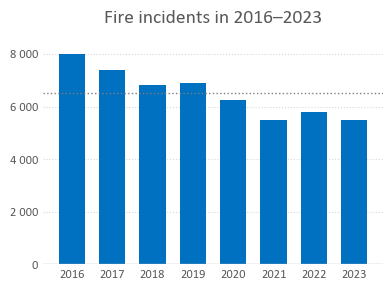

In [71]:
incident_counts = df_analysis['Year'].value_counts()

plt.figure(figsize=(4, 3))
plt.title('Fire incidents in 2016–2023', pad=15)
plt.bar(incident_counts.index, incident_counts.values, color='#0070C0', width=0.65)

plt.tight_layout()

plt.gca().yaxis.set_major_formatter(FuncFormatter(space_formatter))  # Apply to y-axis

plt.axhline(y=0, color='#BFBFBF', linewidth=1)  # Add a horizontal line on the x-axis
plt.axhline(y=np.mean(incident_counts.values), color='#7F7F7F', linewidth=1, linestyle = ':')  # Add a horizontal line on the x-axis

plt.show()

### __Graph 1.1:__

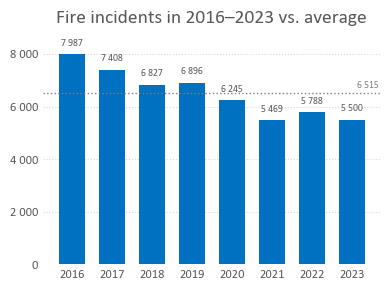

In [72]:
incident_counts = df_analysis['Year'].value_counts().sort_index()  # Count and sort by year
incident_counts = incident_counts.to_dict()  # Convert to dictionary
keys = list(incident_counts.keys())  # Ensure keys are sorted years
values = list(incident_counts.values())

# Calculate average
average_value = np.mean(values)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, values, color='#0070C0', width=0.65) 

# Title and labels
ax.set_title('Fire incidents in 2016–2023 vs. average')
ax.set_xticks(keys)

# Add value labels above each bar
for bar, value in zip(bars, values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 250,  # Y position (slightly above the bar)
        f'{value:,}'.replace(',', ' '),  # Formatted label
        ha='center', va='bottom', fontsize=7, color='#595959'
    )

# Add a horizontal line for the average
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    ax.get_xlim()[1] * 0.99999,  # Position extremely close to the right edge
    average_value + 100,          # Slightly above the average line
    f'{int(average_value):,}'.replace(',', ' '),  # Only the number
    ha='right', va='bottom', fontsize=7, color='#7F7F7F'
)

# Format y-axis with spaces
ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# Tidy layout
plt.tight_layout() #(pad=2.0)  # Add padding to avoid overlaps
plt.show()

### __Graph 1.2:__

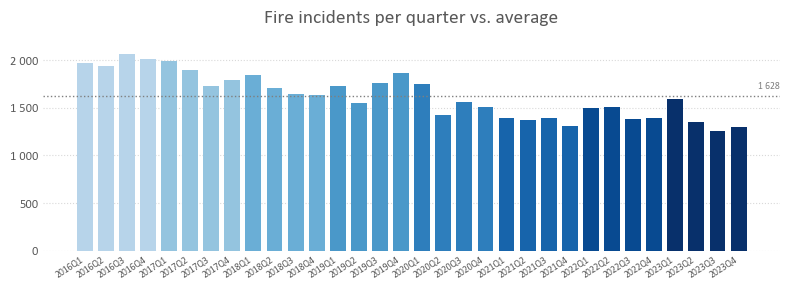

In [73]:
# Your data
incident_counts = df_analysis['Year & quarter'].value_counts().sort_index()
incident_counts = incident_counts.to_dict()
keys = list(incident_counts.keys())
values = list(incident_counts.values())

# Convert keys (Year & Quarter) to strings and extract years
keys = [str(key) for key in keys]  # Convert Period objects to strings
years = [key.split('Q')[0] for key in keys]  # Extract the year part
unique_years = sorted(set(years))

# Generate a colormap subset (e.g., from 30% to 80%)
color_map = plt.cm.Blues
start, stop = 0.3, 1.0
colors = color_map(np.linspace(start, stop, len(unique_years)))

# Map each year to a color
year_to_color = {year: colors[i] for i, year in enumerate(unique_years)}
bar_colors = [year_to_color[year] for year in years]

# Calculate average
average_value = np.mean(values)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.bar(keys, values, color=bar_colors, width=0.75)

# Title and labels
ax.set_title('Fire incidents per quarter vs. average')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, rotation=33, ha='right', fontsize=7)

# Add a horizontal line for the average
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    ax.get_xlim()[1] * 0.99999,
    average_value + 50,
    f'{int(average_value):,}'.replace(',', ' '),
    ha='right', va='bottom', fontsize=7, color='#7F7F7F'
)

# Format y-axis with spaces
def space_formatter(x, pos):
    return f'{int(x):,}'.replace(',', ' ')
ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# Tidy layout
plt.tight_layout()
plt.show()

### __Graph 1.3:__

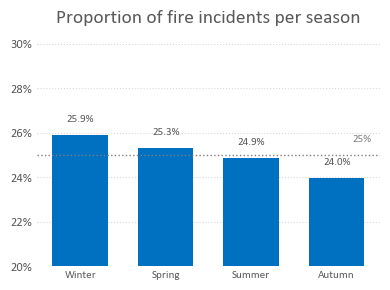

In [74]:
# Your data
incident_counts = df_analysis['Season'].value_counts().sort_index()  # Count and sort by season
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get season names (e.g., Winter, Spring, etc.)
values = incident_counts.tolist()  # Incident counts per season

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color='#0070C0', width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Proportion of fire incidents per season')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, fontsize=8)
ax.set_ylim(20, 30)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Add a horizontal line for the average (25%)
average_value = 25  # Average percentage
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    len(keys) - 0.7,  # Near the last bar
    average_value + 0.5,  # Slightly above the average line
    f'{average_value}%',  # Display as "25%"
    ha='center', va='bottom', fontsize=8, color='#7F7F7F'
)

# Format y-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
#ax.set_ylim(0, max(percentages) + 10)  # Adjust y-axis limits for better spacing

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 1.4:__

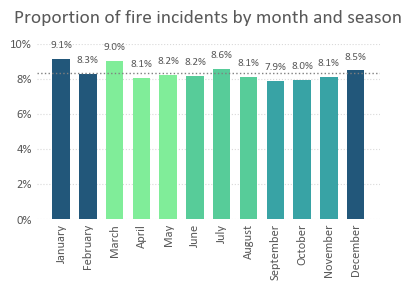

In [75]:
# Season colors
season_colors = {
    "Winter": "#22577a",  # Blue
    "Spring": "#80ed99",  # Green
    "Summer": "#57cc99",  # Orange
    "Autumn": "#38a3a5"   # Red
}

# Your data
incident_counts = df_analysis.groupby('Month').size().sort_index()  # Count incidents by month
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get months (e.g., January, February)
values = incident_counts.tolist()  # Incident counts per month

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Determine colors by season using the existing 'Season' column
season_per_month = df_analysis.groupby('Month')['Season'].first()  # Get season for each month
hues = [season_colors[season_per_month[month]] for month in keys]

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color=hues, width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Proportion of fire incidents by month and season')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, rotation=90)  # Use month names as labels
ax.set_ylim(0, 10)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Add a horizontal line for the average
average_value = 100 / 12  # Average percentage
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Format y-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Add legend for seasons
# season_patches = [
#     plt.Line2D([0], [0], color=color, lw=4, label=season)
#     for season, color in season_colors.items()
# ]
# ax.legend(handles=season_patches, title="Season", fontsize=8, title_fontsize=9)

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 1.5:__

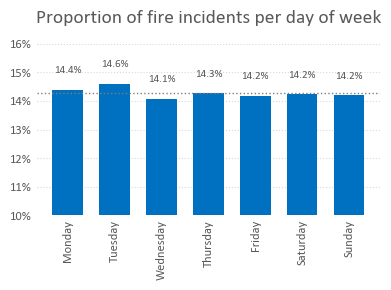

In [76]:
# Your data
incident_counts = df_analysis['Day of week'].value_counts().sort_index()  # Count and sort by season
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get season names (e.g., Winter, Spring, etc.)
values = incident_counts.tolist()  # Incident counts per season

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color='#0070C0', width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Proportion of fire incidents per day of week')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, rotation=90)
ax.set_ylim(10, 16)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Add a horizontal line for the average (25%)
average_value = 100/7  # Average percentage
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
# ax.text(
#     len(keys) - 0.6,  # Near the last bar
#     average_value + 1,  # Slightly above the average line
#     f'{int(average_value)}%',  # Display as "25%"
#     ha='center', va='bottom', fontsize=8, color='#7F7F7F'
# )

# Format y-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
#ax.set_ylim(0, max(percentages) + 10)  # Adjust y-axis limits for better spacing

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 1.6:__

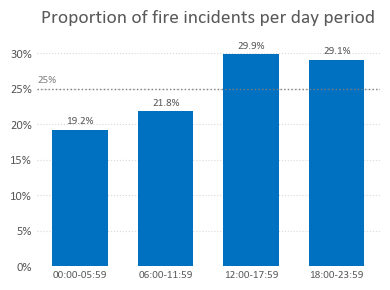

In [77]:
# Your data
incident_counts = df_analysis['Day period'].value_counts().sort_index()  # Count and sort by season
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get season names (e.g., Winter, Spring, etc.)
values = incident_counts.tolist()  # Incident counts per season

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color='#0070C0', width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Proportion of fire incidents per day period')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, fontsize=8)
#ax.set_ylim(20, 30)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Add a horizontal line for the average (25%)
average_value = 25  # Average percentage
ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# Add average value text above the line
ax.text(
    len(keys) - 4.5,  # Near the last bar
    average_value + 0.5,  # Slightly above the average line
    f'{average_value}%',  # Display as "25%"
    ha='left', va='bottom', fontsize=8, color='#7F7F7F'
)

# Format y-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
#ax.set_ylim(0, max(percentages) + 10)  # Adjust y-axis limits for better spacing

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 1.7:__

In [78]:
# # Colors
# season_colors = {
#     "00:00-05:59": "#22577a",  # Blue
#     "06:00-11:59": "#80ed99",  # Green
#     "12:00-17:59": "#57cc99",  # Orange
#     "18:00-23:59": "#38a3a5"   # Red
# }

# # Data
# incident_counts = df_analysis['Hour'].value_counts().sort_index()  # Count and sort by year
# incident_counts = incident_counts.to_dict()  # Convert to dictionary
# keys = list(incident_counts.keys())  # Ensure keys are sorted years
# values = list(incident_counts.values())


# # Determine colors by season using the existing 'Season' column
# season_per_month = df_analysis.groupby('Hour')['Day period'].first()  # Get season for each month
# hues = [season_colors[season_per_month[month]] for month in keys]


# # Calculate average
# # average_value = np.mean(values)

# # Set up the plot
# fig, ax = plt.subplots(figsize=(4, 3))
# # bars = ax.bar(keys, values, color='#0070C0', width=0.65) 
# bars = ax.bar(keys, values, color=hues, width=0.65) 


# # Title and labels
# ax.set_title('Number of fire incidents per hour')
# ax.set_xticks(keys)

# # # Add value labels above each bar
# # for bar, value in zip(bars, values):
# #     ax.text(
# #         bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
# #         bar.get_height() + 250,  # Y position (slightly above the bar)
# #         f'{value:,}'.replace(',', ' '),  # Formatted label
# #         ha='center', va='bottom', fontsize=7, color='#595959'
# #     )

# # Add a horizontal line for the average
# # ax.axhline(y=average_value, color='#7F7F7F', linewidth=1, linestyle=':')

# # Add average value text above the line
# # ax.text(
# #     ax.get_xlim()[1] * 0.99999,  # Position extremely close to the right edge
# #     average_value + 100,          # Slightly above the average line
# #     f'{int(average_value):,}'.replace(',', ' '),  # Only the number
# #     ha='right', va='bottom', fontsize=7, color='#7F7F7F'
# # )

# # Format y-axis with spaces
# ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# # Tidy layout
# plt.tight_layout() #(pad=2.0)  # Add padding to avoid overlaps
# plt.show()

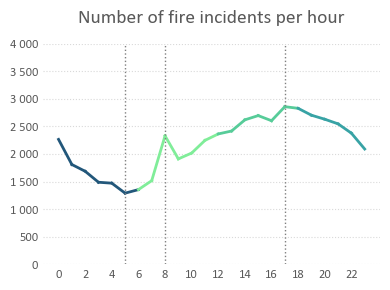

In [79]:
# Colors
season_colors = {
    "00:00-05:59": "#22577a",  # Blue (Night)
    "06:00-11:59": "#80ed99",  # Green (Morning)
    "12:00-17:59": "#57cc99",  # Orange (Noon)
    "18:00-23:59": "#38a3a5"   # Red (Evening)
}

# Data
incident_counts = df_analysis['Hour'].value_counts().sort_index()  # Count and sort by hour
keys = list(incident_counts.index)  # Hour keys
values = list(incident_counts.values)  # Incident counts

# Assign colors based on 'Day period' column
day_periods = df_analysis.groupby('Hour')['Day period'].first()  # Get day periods for each hour
hues = [season_colors[day_periods[key]] for key in keys]

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))

# Plot line chart with colors
for i in range(len(keys) - 1):
    ax.plot(
        keys[i:i+2], values[i:i+2], color=hues[i], linewidth=2
    )  # Segment coloring by day period

# Title and labels
ax.set_title('Number of fire incidents per hour')

# Format x-axis ticks (ensure they are hourly)
ax.set_xticks(range(0, 24, 2))
#ax.set_xticklabels([f'{hour:02d}' for hour in range(24)], rotation=0)
ax.set_ylim(0, 4000)
ax.axvline(x=incident_counts.idxmin(), color='#7F7F7F', linewidth=1, linestyle=':')
ax.axvline(x=8, color='#7F7F7F', linewidth=1, linestyle=':')
ax.axvline(x=incident_counts.idxmax(), color='#7F7F7F', linewidth=1, linestyle=':')


# Format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Tidy layout
plt.tight_layout()
plt.show()

### __Graph 1.8:__

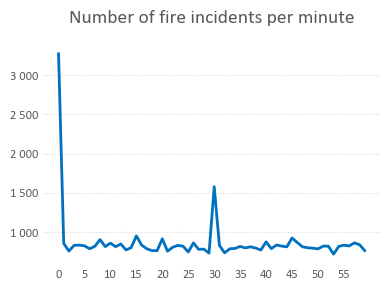

In [80]:
# Data
incident_counts = df_analysis['Minute'].value_counts().sort_index()  # Count and sort by minute
keys = list(incident_counts.index)  # Minute keys (0-59)
values = list(incident_counts.values)  # Incident counts

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))

# Plot line chart
ax.plot(keys, values, color='#0070C0', linewidth=2)  # Simple line chart

# Title and labels
ax.set_title('Number of fire incidents per minute')

# Format x-axis ticks (0-59 for minutes)
ax.set_xticks(range(0, 60, 5))  # Tick every 5 minutes
# ax.set_xticklabels([f'{minute:02d}' for minute in range(0, 60, 5)])  # Format minute numbers as "00", "05", etc.

# Format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Tidy layout
plt.tight_layout()
plt.show()


### __Graph 1.9:__

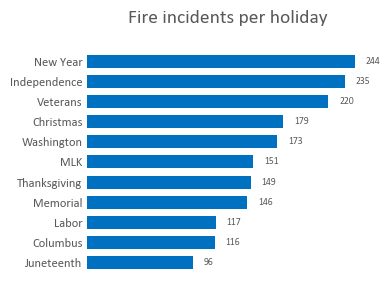

In [81]:
incident_counts = (
    df_analysis[df_analysis['Holiday'] != 'Workday']['Holiday']
    .astype(str)  # Convert to string to drop unused categories
    .value_counts()
)
keys = list(incident_counts.index)  # Get holiday categories
values = list(incident_counts.values)  # Get incident counts

# Reverse the order of keys and values to start with the most occurrences
keys = keys[::-1]  # Reverse keys
values = values[::-1]  # Reverse values

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.barh(keys, values, color='#0070C0', height=0.65)  # Horizontal bar chart

# Title and labels
ax.set_title('Fire incidents per holiday')

# Add value labels to the bars
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width() + 10,  # Position label slightly after the bar
        bar.get_y() + bar.get_height() / 2,  # Center the label vertically on the bar
        f'{value:,}'.replace(',', ' '),  # Format the label
        ha='left', va='center', fontsize=7, color='#595959'
    )

# Disable horizontal gridlines
ax.grid(visible=False, axis='y')

# Disable x-axis
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

## __2.3 Location graphs__

### __Graph 2.1:__

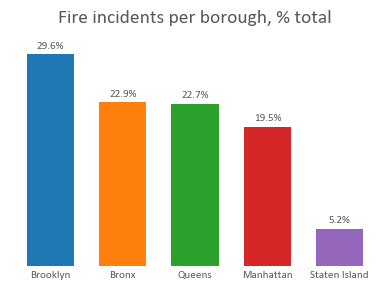

In [82]:
# Data
incident_counts = df_analysis['Borough'].value_counts()  # Count by borough
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get season names (e.g., Winter, Spring, etc.)
values = incident_counts.tolist()  # Incident counts per season

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Set up color hues for each borough
colors = sns.color_palette("tab10", len(keys))  # Seaborn palette (10 colors max)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color=colors, width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Fire incidents per borough, % total')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, fontsize=8)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Remove y-axis ticks, labels, and gridlines
ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove ticks and labels
ax.grid(visible=False, axis='y')  # Disable horizontal gridlines
    
# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 2.2:__

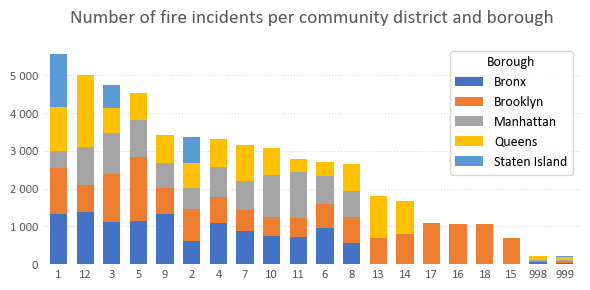

In [83]:
# Create pivot table
pivot_table = pd.pivot_table(data=df_analysis, 
                             index='Community district', 
                             columns='Borough', 
                             aggfunc='size',  # Use 'size' to count occurrences
                             fill_value=0)  # Fill NaN with 0 if no incidents in that combination

# Sort pivot table by the sum of the values (fire incidents) in each row (community district)
pivot_table['Total'] = pivot_table.sum(axis=1)  # Add a 'Total' column with the sum of incidents
pivot_table = pivot_table.sort_values(by='Total', ascending=False)  # Sort by 'Total' column

# Drop the 'Total' column since we no longer need it for plotting
pivot_table = pivot_table.drop(columns='Total')

# Reset index to turn 'Community district' back into a column
pivot_table = pivot_table.reset_index()

# # Define colors for each Borough (or use a custom palette)
# borough_colors = {
#     'Manhattan': '#1F77B4',
#     'Brooklyn': '#FF7F0E',
#     'Queens': '#2CA02C',
#     'Bronx': '#D62728',
#     'Staten Island': '#9467BD'
# }

# Plot the pivot table as a stacked bar chart with specific colors per Borough
ax = pivot_table.plot(x='Community district', kind='bar', stacked=True, figsize=(6, 3), width=0.65)#, 
                      # color=[borough_colors[col] for col in pivot_table.columns[1:]])

# Title and labels
ax.set_title('Number of fire incidents per community district and borough')

# Disable x-axis label
ax.set_xlabel('')

# Rotate x-axis values to normal (0 degrees)
ax.tick_params(axis='x', rotation=0)

# Remove vertical gridlines
ax.grid(axis='x', which='both', visible=False)

# Format y-axis with spaces
ax.yaxis.set_major_formatter(FuncFormatter(space_formatter))

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

### __Graph 2.3:__

In [84]:
# Step 1: Filter out 'Workday' and create a copy to avoid SettingWithCopyWarning
df_filter_holiday = df_analysis[~df_analysis['Holiday'].isin(['Workday'])].copy()

# Remove unused categories safely
df_filter_holiday['Holiday'] = df_filter_holiday['Holiday'].cat.remove_unused_categories()

# Sort the 'Holiday' column categories alphabetically
df_filter_holiday['Holiday'] = df_filter_holiday['Holiday'].cat.set_categories(sorted(df_filter_holiday['Holiday'].cat.categories))

# Step 2: Calculate proportion of incidents between boroughs on "Workday"
# First, create a pivot table with holiday and borough as the index and columns
pivot_table = pd.pivot_table(
    data=df_filter_holiday,
    index='Holiday',
    columns='Borough',
    aggfunc='size',
    fill_value=0
)

# Step 3: Convert the counts into percentages by row total
row_totals = pivot_table.sum(axis=1)
pivot_table_percentage = pivot_table.div(row_totals, axis=0) * 100
pivot_table_percentage

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Holiday,,,,,
Christmas,25.698324,29.608939,20.670391,18.994413,5.027933
Columbus,25.000000,25.862069,18.965517,25.862069,4.310345
Independence,24.680851,29.787234,18.297872,19.148936,8.085106
Juneteenth,22.916667,27.083333,18.750000,21.875000,9.375000
Labor,20.512821,28.205128,18.803419,22.222222,10.256410
MLK,25.165563,41.059603,11.258278,19.205298,3.311258
Memorial,21.917808,29.452055,22.602740,20.547945,5.479452
New Year,25.819672,23.360656,18.852459,25.409836,6.557377
Thanksgiving,18.791946,32.885906,20.805369,23.489933,4.026846


In [85]:
# Step 1: Filter out 'Workday' and create a copy to avoid SettingWithCopyWarning
df_filter_workday = df_analysis[df_analysis['Holiday'].isin(['Workday'])].copy()

# Remove unused categories safely
df_filter_workday['Holiday'] = df_filter_workday['Holiday'].cat.remove_unused_categories()

# Step 2: Calculate proportion of incidents between boroughs on "Workday"
# First, create a pivot table with holiday and borough as the index and columns
pivot_table = pd.pivot_table(
    data=df_filter_workday,
    index='Holiday',
    columns='Borough',
    aggfunc='size',
    fill_value=0
)

# Step 3: Convert the counts into percentages by row total
row_totals = pivot_table.sum(axis=1)
pivot_table_percentage_total = pivot_table.div(row_totals, axis=0) * 100

pivot_table_percentage_total

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Holiday,,,,,
Workday,22.891399,29.607906,19.553028,22.7721,5.175568


In [86]:
# Extract the 'Workday' row from the pivot_table_percentage
workday_values = pivot_table_percentage_total.loc['Workday']

# Subtract the 'Workday' values from the entire pivot_table_percentage
surplus_deficit = pivot_table_percentage.subtract(workday_values, axis=1)

# Format the values as %
surplus_deficit = surplus_deficit.style.format("{:.1f}%") \
    .set_caption("Deviation from a normal workday per holiday & borough")  # Add a header

# Apply a background gradient for the color coding
surplus_deficit = surplus_deficit.background_gradient(cmap='RdBu', axis=None)  # Blue to Yellow color scale #coolwarm, brw, PuOr, RdGy, RdBu

# Set equal column width for all columns
surplus_deficit.set_properties(**{'width': '50px'})

# Function to color cells between -2% and 2% with gray
def color_significant(val):
    if -2 <= val <= 2:
        return 'background-color: white'
    else:
        return ''  # No background color for other values

# Apply the coloring function to each cell
surplus_deficit = surplus_deficit.applymap(color_significant)

# Display the result
surplus_deficit

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Holiday,,,,,
Christmas,2.8%,0.0%,1.1%,-3.8%,-0.1%
Columbus,2.1%,-3.7%,-0.6%,3.1%,-0.9%
Independence,1.8%,0.2%,-1.3%,-3.6%,2.9%
Juneteenth,0.0%,-2.5%,-0.8%,-0.9%,4.2%
Labor,-2.4%,-1.4%,-0.7%,-0.5%,5.1%
MLK,2.3%,11.5%,-8.3%,-3.6%,-1.9%
Memorial,-1.0%,-0.2%,3.0%,-2.2%,0.3%
New Year,2.9%,-6.2%,-0.7%,2.6%,1.4%
Thanksgiving,-4.1%,3.3%,1.3%,0.7%,-1.1%


### __Graph 2.4:__

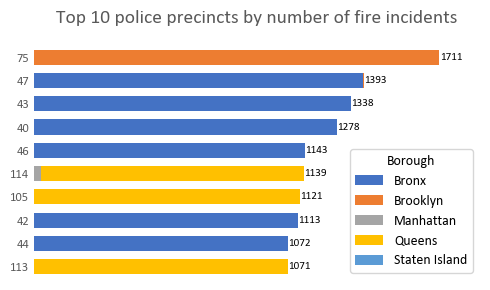

In [87]:
# Create pivot table
pivot_table_precinct_max = pd.pivot_table(data=df_analysis, 
                             index='Police precinct', 
                             columns='Borough', 
                             aggfunc='size',  # Use 'size' to count occurrences
                             fill_value=0)  # Fill NaN with 0 if no incidents in that combination

# Sort pivot table by the sum of the values (fire incidents) in each row (police precinct)
pivot_table_precinct_max['Total'] = pivot_table_precinct_max.sum(axis=1)  # Add a 'Total' column with the sum of incidents
pivot_table_precinct_max = pivot_table_precinct_max.sort_values(by='Total', ascending=False)  # Sort by 'Total' column
pivot_table_precinct_max = pivot_table_precinct_max[:10]

# Drop the 'Total' column from the plot data
plot_data = pivot_table_precinct_max.drop(columns='Total').reset_index()

# # Define colors for each Borough (or use a custom palette)
# borough_colors = {
#     'Manhattan': '#1F77B4',
#     'Brooklyn': '#FF7F0E',
#     'Queens': '#2CA02C',
#     'Bronx': '#D62728',
#     'Staten Island': '#9467BD'
# }

# Plot the pivot table as a horizontal stacked bar chart
ax = plot_data.plot(x='Police precinct', kind='barh', stacked=True, figsize=(5, 3), width=0.65)
                      # color=[borough_colors[col] for col in pivot_table.columns[1:]])

# Reverse y-axis order
ax.invert_yaxis()

# Title and labels
ax.set_title('Top 10 police precincts by number of fire incidents')

# Remove the x-axis (ticks, labels, and title)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)

ax.set_xlim(0, int(pivot_table_precinct_max[:1]['Total']) * 1.1)


# Remove  gridlines
ax.grid(axis='x', which='both', visible=False)
ax.grid(axis='y', which='both', visible=False)

# Add total values to the far right of the bars
for index, total in enumerate(pivot_table_precinct_max['Total']):
    ax.text(total + 1, index, f'{int(total)}', va='center', fontsize=8, color='black')

# Format x-axis (formerly y-axis) with spaces
ax.xaxis.set_major_formatter(FuncFormatter(space_formatter))

# Disable x-axis label
ax.set_ylabel('')

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

### __Graph 2.5:__

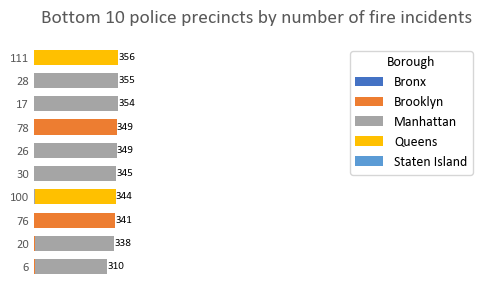

In [88]:
# Filter out '998' and '999' and create a copy to avoid SettingWithCopyWarning
df_filter_precinct = df_analysis[~df_analysis['Police precinct'].isin(['998', '999'])].copy()

# Remove unused categories safely
df_filter_precinct['Police precinct'] = df_filter_precinct['Police precinct'].cat.remove_unused_categories()

# Create pivot table
pivot_table_precinct_min = pd.pivot_table(data=df_filter_precinct, 
                             index='Police precinct', 
                             columns='Borough', 
                             aggfunc='size',  # Use 'size' to count occurrences
                             fill_value=0)  # Fill NaN with 0 if no incidents in that combination

# Sort pivot table by the sum of the values (fire incidents) in each row (police precinct)
pivot_table_precinct_min['Total'] = pivot_table_precinct_min.sum(axis=1)  # Add a 'Total' column with the sum of incidents
pivot_table_precinct_min = pivot_table_precinct_min.sort_values(by='Total', ascending=False)  # Sort by 'Total' column
pivot_table_precinct_min = pivot_table_precinct_min[-10:]

# Drop the 'Total' column from the plot data
plot_data = pivot_table_precinct_min.drop(columns='Total').reset_index()

# # Define colors for each Borough (or use a custom palette)
# borough_colors = {
#     'Manhattan': '#1F77B4',
#     'Brooklyn': '#FF7F0E',
#     'Queens': '#2CA02C',
#     'Bronx': '#D62728',
#     'Staten Island': '#9467BD'
# }

# Plot the pivot table as a horizontal stacked bar chart
ax = plot_data.plot(x='Police precinct', kind='barh', stacked=True, figsize=(5, 3), width=0.65)
                      # color=[borough_colors[col] for col in pivot_table.columns[1:]])

    
ax.set_xlim(0, int(pivot_table_precinct_max[:1]['Total']) * 1.1)
    
# Reverse y-axis order
ax.invert_yaxis()

# Title and labels
ax.set_title('Bottom 10 police precincts by number of fire incidents')

# Remove the x-axis (ticks, labels, and title)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)

# Remove  gridlines
ax.grid(axis='x', which='both', visible=False)
ax.grid(axis='y', which='both', visible=False)

# Add total values to the far right of the bars
for index, total in enumerate(pivot_table_precinct_min['Total']):
    ax.text(total + 1, index, f'{int(total)}', va='center', fontsize=8, color='black')

# Format x-axis (formerly y-axis) with spaces
ax.xaxis.set_major_formatter(FuncFormatter(space_formatter))

# Disable x-axis label
ax.set_ylabel('')

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

### __Graph 2.6:__

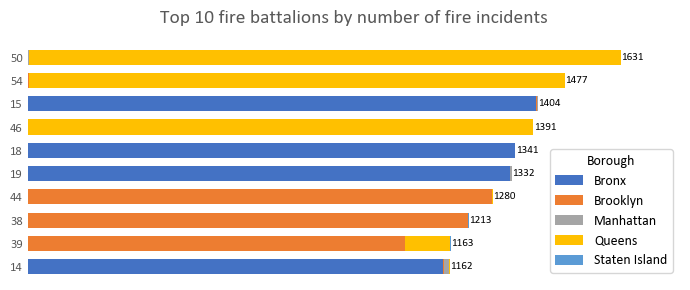

In [89]:
# Filter out '998' and '999' and create a copy to avoid SettingWithCopyWarning
df_filter_firebat = df_analysis[~df_analysis['Fire battalion'].isin(['998', '999'])].copy()

# Remove unused categories safely
df_filter_firebat['Fire battalion'] = df_filter_firebat['Fire battalion'].cat.remove_unused_categories()

# Create pivot table
pivot_table_firebat_max = pd.pivot_table(data=df_filter_firebat, 
                             index='Fire battalion', 
                             columns='Borough', 
                             aggfunc='size',  # Use 'size' to count occurrences
                             fill_value=0)  # Fill NaN with 0 if no incidents in that combination

# Sort pivot table by the sum of the values (fire incidents) in each row (fire battalion)
pivot_table_firebat_max['Total'] = pivot_table_firebat_max.sum(axis=1)  # Add a 'Total' column with the sum of incidents
pivot_table_firebat_max = pivot_table_firebat_max.sort_values(by='Total', ascending=False)  # Sort by 'Total' column
pivot_table_firebat_max = pivot_table_firebat_max[:10]

# Drop the 'Total' column from the plot data
plot_data = pivot_table_firebat_max.drop(columns='Total').reset_index()

# # Define colors for each Borough (or use a custom palette)
# borough_colors = {
#     'Manhattan': '#1F77B4',
#     'Brooklyn': '#FF7F0E',
#     'Queens': '#2CA02C',
#     'Bronx': '#D62728',
#     'Staten Island': '#9467BD'
# }

# Plot the pivot table as a horizontal stacked bar chart
ax = plot_data.plot(x='Fire battalion', kind='barh', stacked=True, figsize=(7, 3), width=0.65)
                      # color=[borough_colors[col] for col in pivot_table.columns[1:]])

# Reverse y-axis order
ax.invert_yaxis()

# Title and labels
ax.set_title('Top 10 fire battalions by number of fire incidents')

# Remove the x-axis (ticks, labels, and title)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)

ax.set_xlim(0, int(pivot_table_firebat_max[:1]['Total']) * 1.1)


# Remove  gridlines
ax.grid(axis='x', which='both', visible=False)
ax.grid(axis='y', which='both', visible=False)

# Add total values to the far right of the bars
for index, total in enumerate(pivot_table_firebat_max['Total']):
    ax.text(total + 1, index, f'{int(total)}', va='center', fontsize=8, color='black')

# Format x-axis (formerly y-axis) with spaces
ax.xaxis.set_major_formatter(FuncFormatter(space_formatter))

# Disable x-axis label
ax.set_ylabel('')

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

### __Graph 2.7:__

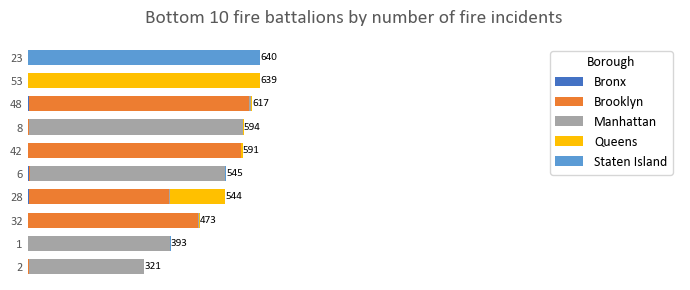

In [90]:
# Filter out '998' and '999' and create a copy to avoid SettingWithCopyWarning
df_filter_firebat = df_analysis[~df_analysis['Fire battalion'].isin(['998', '999'])].copy()

# Remove unused categories safely
df_filter_firebat['Fire battalion'] = df_filter_firebat['Fire battalion'].cat.remove_unused_categories()

# Create pivot table
pivot_table_firebat_min = pd.pivot_table(data=df_filter_firebat, 
                             index='Fire battalion', 
                             columns='Borough', 
                             aggfunc='size',  # Use 'size' to count occurrences
                             fill_value=0)  # Fill NaN with 0 if no incidents in that combination

# Sort pivot table by the sum of the values (fire incidents) in each row (fire battalion)
pivot_table_firebat_min['Total'] = pivot_table_firebat_min.sum(axis=1)  # Add a 'Total' column with the sum of incidents
pivot_table_firebat_min = pivot_table_firebat_min.sort_values(by='Total', ascending=False)  # Sort by 'Total' column
pivot_table_firebat_min = pivot_table_firebat_min[-10:]

# Drop the 'Total' column from the plot data
plot_data = pivot_table_firebat_min.drop(columns='Total').reset_index()

# # Define colors for each Borough (or use a custom palette)
# borough_colors = {
#     'Manhattan': '#1F77B4',
#     'Brooklyn': '#FF7F0E',
#     'Queens': '#2CA02C',
#     'Bronx': '#D62728',
#     'Staten Island': '#9467BD'
# }

# Plot the pivot table as a horizontal stacked bar chart
ax = plot_data.plot(x='Fire battalion', kind='barh', stacked=True, figsize=(7, 3), width=0.65)
                      # color=[borough_colors[col] for col in pivot_table.columns[1:]])

# Reverse y-axis order
ax.invert_yaxis()

# Title and labels
ax.set_title('Bottom 10 fire battalions by number of fire incidents')

# Remove the x-axis (ticks, labels, and title)
ax.set_xlabel('')
ax.tick_params(axis='x', bottom=False, labelbottom=False)

ax.set_xlim(0, int(pivot_table_firebat_max[:1]['Total']) * 1.1)


# Remove  gridlines
ax.grid(axis='x', which='both', visible=False)
ax.grid(axis='y', which='both', visible=False)

# Add total values to the far right of the bars
for index, total in enumerate(pivot_table_firebat_min['Total']):
    ax.text(total + 1, index, f'{int(total)}', va='center', fontsize=8, color='black')

# Format x-axis (formerly y-axis) with spaces
ax.xaxis.set_major_formatter(FuncFormatter(space_formatter))

# Disable x-axis label
ax.set_ylabel('')

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

### __Graph 2.8: [synchronize hue with graph 2.9]__

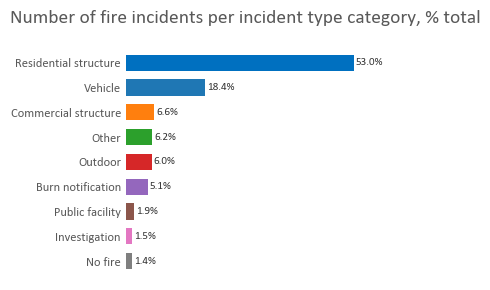

In [91]:
# Your data
incident_counts = (
    df_analysis['Incident type category']
    .astype(str)  # Convert to string to drop unused categories
    .value_counts()
)  # Count occurrences
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get fire cause categories
values = incident_counts.tolist()  # Incident counts per category

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]

# Sort categories by percentage in descending order
sorted_data = sorted(zip(percentages, keys), reverse=True)  # Sort by percentages
percentages, keys = zip(*sorted_data)  # Unzip into sorted percentages and keys

# Define a custom color palette (adjust if needed)
colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]
colors = colors[:len(keys)]  # Trim color list to match the number of categories

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust figure size if needed
bars = ax.barh(keys, percentages, color=colors, height=0.65)  # Plot horizontal bars

# Title and labels
ax.set_title('Number of fire incidents per incident type category, % total')#, fontsize=12, pad=15)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.1f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Remove gridlines for cleaner look
ax.grid(visible=False, axis='y')

# Reverse the y-axis to start with categories with the highest percentage
ax.invert_yaxis()

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 2.9: [synchronize hue with graph 2.8]__

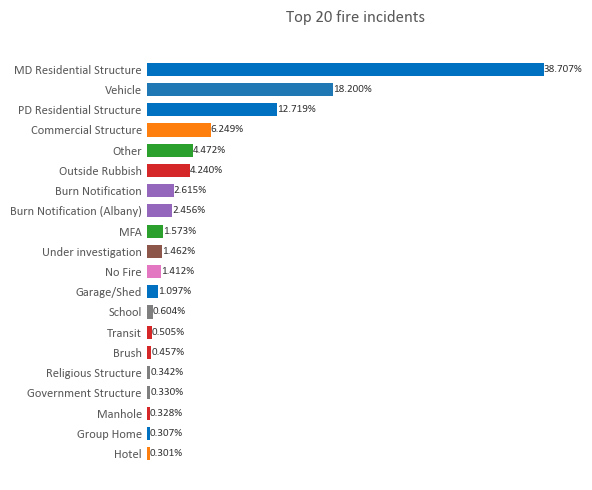

In [92]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your manually defined color palette
manual_colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]

# Step 1: Prepare your data
incident_counts = (
    df_analysis['Incident type']
    .astype(str)
    .value_counts()
)

# Get top 20 fire causes
top_20_fire_causes = incident_counts.head(20)

# Extract fire causes and their counts
fire_causes = top_20_fire_causes.index.tolist()
counts = top_20_fire_causes.tolist()
counts_all = incident_counts.tolist()

# Calculate total incidents for percentage calculation
total_incidents = sum(counts_all)
percentages = [count / total_incidents * 100 for count in counts]

# Step 2: Group by Fire Cause to get the corresponding Fire Cause Categories
# Map each fire cause to its category
fire_cause_categories = df_analysis.groupby('Incident type')['Incident type category'].first().loc[fire_causes]

# Step 3: Map colors manually
# Get the unique fire cause categories in the same order as the fire causes
unique_categories = fire_cause_categories.unique()

# Ensure we don't exceed the color palette length
colors = manual_colors[:len(unique_categories)]

# Create a mapping from categories to colors
category_colors = dict(zip(unique_categories, colors))

# Map the colors based on the fire cause categories for the top 20 fire causes
mapped_colors = fire_cause_categories.map(category_colors)

# Step 4: Set figure size
fig, ax = plt.subplots(figsize=(6, 5))

# Step 5: Create horizontal bar chart with top 20 fire causes
bars = ax.barh(fire_causes, counts, color=mapped_colors, height=0.65)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.3f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Customize the plot
ax.set_title('Top 20 fire incidents', fontsize=12, pad=15)

ax.invert_yaxis()  # Reverse the y-axis so largest values are at the top
ax.grid(False)  # Disable gridlines
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely

# Show the plot
plt.show()

## __2.4 Causes graphs__

### __Graph 3.1: [synchronize hue with graph 3.2]__

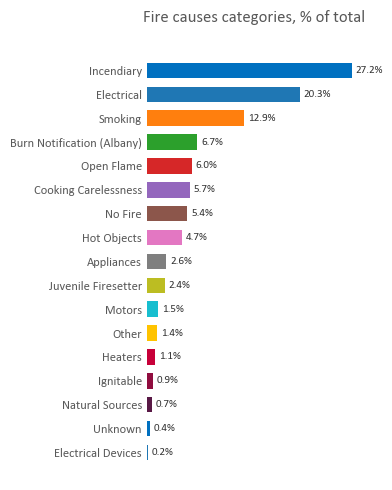

In [93]:
# Your data
incident_counts = (
    df_analysis[df_analysis['Fire cause category'] != 'Preliminary Investigation']['Fire cause category']
    .astype(str)  # Convert to string to drop unused categories
    .value_counts()
)  # Count occurrences
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get fire cause categories
values = incident_counts.tolist()  # Incident counts per category

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]

# Sort categories by percentage in descending order
sorted_data = sorted(zip(percentages, keys), reverse=True)  # Sort by percentages
percentages, keys = zip(*sorted_data)  # Unzip into sorted percentages and keys

# Define a custom color palette (adjust if needed)
colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]
colors = colors[:len(keys)]  # Trim color list to match the number of categories

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 5))  # Adjust figure size if needed
bars = ax.barh(keys, percentages, color=colors, height=0.65)  # Plot horizontal bars

# Title and labels
ax.set_title('Fire causes categories, % of total', fontsize=12, pad=15)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.1f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Remove gridlines for cleaner look
ax.grid(visible=False, axis='y')

# Reverse the y-axis to start with categories with the highest percentage
ax.invert_yaxis()

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

### __Graph 3.2:  [synchronize hue with graph 3.1]__

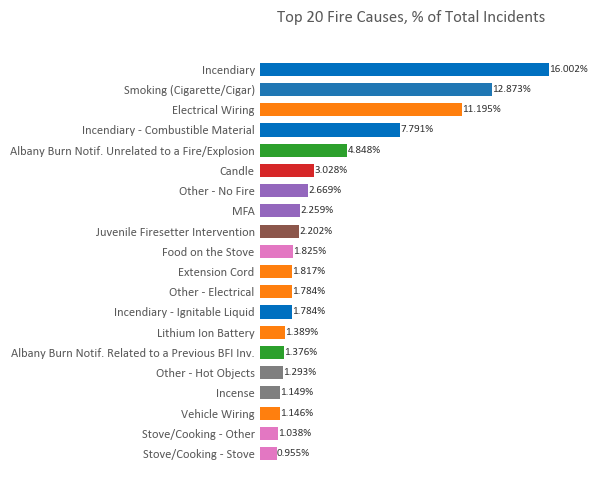

In [94]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Your manually defined color palette
manual_colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]

# Step 1: Prepare your data
incident_counts = (
    df_analysis[df_analysis['Fire cause category'] != 'Preliminary Investigation']['Fire cause']
    .astype(str)
    .value_counts()
)

# Get top 20 fire causes
top_20_fire_causes = incident_counts.head(20)

# Extract fire causes and their counts
fire_causes = top_20_fire_causes.index.tolist()
counts = top_20_fire_causes.tolist()
counts_all = incident_counts.tolist()

# Calculate total incidents for percentage calculation
total_incidents = sum(counts_all)
percentages = [count / total_incidents * 100 for count in counts]

# Step 2: Group by Fire Cause to get the corresponding Fire Cause Categories
# Map each fire cause to its category
fire_cause_categories = df_analysis.groupby('Fire cause')['Fire cause category'].first().loc[fire_causes]

# Step 3: Map colors manually
# Get the unique fire cause categories in the same order as the fire causes
unique_categories = fire_cause_categories.unique()

# Ensure we don't exceed the color palette length
colors = manual_colors[:len(unique_categories)]

# Create a mapping from categories to colors
category_colors = dict(zip(unique_categories, colors))

# Map the colors based on the fire cause categories for the top 20 fire causes
mapped_colors = fire_cause_categories.map(category_colors)

# Step 4: Set figure size
fig, ax = plt.subplots(figsize=(6, 5))

# Step 5: Create horizontal bar chart with top 20 fire causes
bars = ax.barh(fire_causes, counts, color=mapped_colors, height=0.65)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.3f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Customize the plot
ax.set_title('Top 20 Fire Causes, % of Total Incidents', fontsize=12, pad=15)

ax.invert_yaxis()  # Reverse the y-axis so largest values are at the top
ax.grid(False)  # Disable gridlines
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely

# Show the plot
plt.show()

## __2.5 Development graphs__

### __Graph 4.1:__

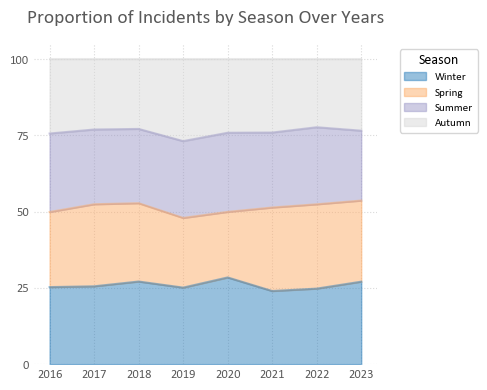

In [95]:
# Aggregate data: Count incidents by Year and Season
seasonal_counts = df_analysis.groupby(['Year', 'Season']).size().unstack(fill_value=0)

# Normalize data to get percentages
seasonal_percentages = seasonal_counts.div(seasonal_counts.sum(axis=1), axis=0) * 100

# Plot the 100% stacked area chart
ax = seasonal_percentages.plot.area(
    stacked=True,
    cmap="tab20c",  # Colormap for distinct colors
    alpha=0.50,
    figsize=(5, 4),
)

# Customize the chart
plt.title("Proportion of Incidents by Season Over Years")
# plt.xticks(ticks=seasonal_percentages.index, fontsize=12, rotation=45)
# plt.yticks(fontsize=12)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
# plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.yticks(np.arange(0, 101, 25))
ax.set_xlabel('')  # Disable the x-axis label

# Show the chart
plt.tight_layout()
plt.show()

### __Graph 4.2:__

In [96]:
# Create the pivot table with counts
pivot_table = pd.pivot_table(
    data=df_analysis,
    index='Year',                        # Rows will represent 'Year'
    columns='Season',       # Columns will represent 'Fire cause category'
    values='ID',                         # Use 'ID' to count the number of incidents
    aggfunc='count',                     # Aggregate by counting occurrences
    fill_value=0                         # Fill missing values with 0
)

# Flatten the MultiIndex columns and merge them with 'Year'
pivot_table.columns = [f"{col}" for col in pivot_table.columns]

# Normalize each row to calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Add a 'Total' row to represent the column totals as percentages
pivot_table_percentage.loc['Total'] = pivot_table.sum(axis=0) / pivot_table.sum().sum() * 100

# Format percentages for better readability (round to one decimal place)
pivot_table_percentage = pivot_table_percentage.round(1)

# Get the highest value in the table for scaling
max_value = pivot_table_percentage.max().max()

# Styled table with customized bars
styled_table = (
    pivot_table_percentage.style
    .bar(
        align='mid',  # Align bars in the middle for better visualization
        color='#0070C0',  # Use blue color for bars
        vmin=0, vmax=50  # Scale bars based on the highest value in the table
    )
    .format("{:.1f}%")  # Display numbers with one decimal place
    .set_table_styles([
        {"selector": "th", "props": [("padding", "0px 10px"), ("vertical-align", "middle"), ("text-align", "center")]},  # Style for headers
        {"selector": "td", "props": [("padding", "3px 10px"), ("vertical-align", "middle"), ("background-color", "white")]},  # Adjust cell padding and remove banding
        {"selector": ".bar", "props": [("height", "5px"), ("margin", "5px 0")]},  # Limit bar height and add margins
    ], overwrite=True)  # Overwrite default styles to remove grey banding
)

# To view the styled table in a notebook:
styled_table

,Winter,Spring,Summer,Autumn
Year,,,,
2016,25.3%,24.6%,25.7%,24.4%
2017,25.5%,26.9%,24.5%,23.1%
2018,27.1%,25.7%,24.3%,22.9%
2019,25.1%,22.8%,25.2%,26.9%
2020,28.4%,21.5%,25.9%,24.1%
2021,24.0%,27.4%,24.6%,24.1%
2022,24.8%,27.6%,25.3%,22.3%
2023,27.0%,26.6%,22.9%,23.5%
Total,25.9%,25.3%,24.9%,24.0%


### __Graph 4.3:__

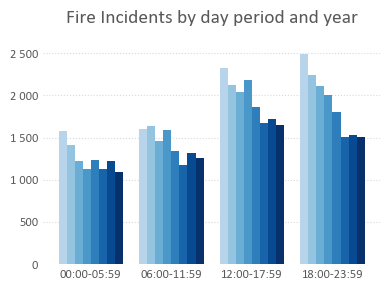

In [97]:
# Group data by 'Day period' and 'Year', then count incidents
grouped_counts = df_analysis.groupby(['Day period', 'Year']).size().unstack(fill_value=0)

# Set up the color map
color_map = plt.cm.Blues
start, stop = 0.3, 1.0
colors = [color_map(x) for x in np.linspace(start, stop, grouped_counts.columns.size)]

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size for better readability
width = 0.1  # Width of each bar
x_positions = np.arange(len(grouped_counts.index))  # X-axis positions for 'Day period'

# Plot bars for each year within each day period
for i, year in enumerate(grouped_counts.columns):
    ax.bar(
        x_positions + i * width,  # Offset bars within each day period
        grouped_counts[year],  # Data for the specific year
        width=width,
        color=colors[i],
        label=str(year)  # Add year as the legend
    )

# Title, labels, and ticks
ax.set_title('Fire Incidents by day period and year')
ax.set_xticks(x_positions + width * (len(grouped_counts.columns) / 2 - 0.5))  # Center x-ticks
ax.set_xticklabels(grouped_counts.index)  # Day period labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Tidy layout
plt.tight_layout()
plt.show()

### __Graph 4.4:__

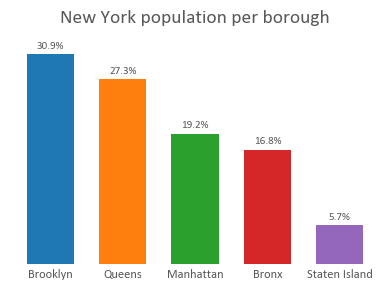

In [98]:
# Aggregate population by borough and calculate total population
borough_population = df_pop.groupby('Borough')['Population'].sum().reset_index()
total_population = borough_population['Population'].sum()
borough_population['Percentage'] = borough_population['Population'] / total_population * 100

# Sort boroughs by population (descending)
borough_population = borough_population.sort_values(by='Population', ascending=False)

# Set up color hues for each borough
colors = sns.color_palette("tab10", len(borough_population))  # Seaborn palette (10 colors max)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(
    borough_population['Borough'], 
    borough_population['Percentage'], 
    color=colors, 
    width=0.65
)

# Title and labels
ax.set_title('New York population per borough')
# ax.set_xticks(range(len(borough_population['Borough'])))
# ax.set_xticklabels(borough_population['Borough'], fontsize=8)

# Add value labels above each bar
for bar, percentage in zip(bars, borough_population['Percentage']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Remove y-axis ticks, labels, and gridlines
ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove ticks and labels
ax.grid(visible=False, axis='y')  # Disable horizontal gridlines
    
# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

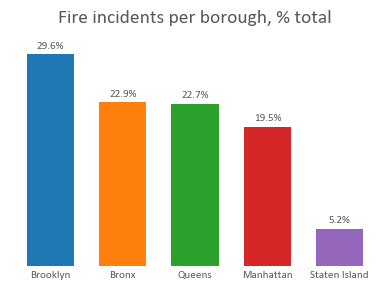

In [99]:
# Data
incident_counts = df_analysis['Borough'].value_counts()  # Count by borough
total_incidents = incident_counts.sum()  # Calculate total incidents
keys = incident_counts.index.tolist()  # Get season names (e.g., Winter, Spring, etc.)
values = incident_counts.tolist()  # Incident counts per season

# Calculate percentages
percentages = [value / total_incidents * 100 for value in values]  # Convert to percentages

# Set up color hues for each borough
colors = sns.color_palette("tab10", len(keys))  # Seaborn palette (10 colors max)

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))
bars = ax.bar(keys, percentages, color=colors, width=0.65)  # Plot percentages as bars

# Title and labels
ax.set_title('Fire incidents per borough, % total')
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, fontsize=8)

# Add value labels above each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height() + 0.5,  # Y position (slightly above the bar)
        f'{percentage:.1f}%',  # Formatted percentage
        ha='center', va='bottom', fontsize=8, color='#595959'
    )

# Remove y-axis ticks, labels, and gridlines
ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove ticks and labels
ax.grid(visible=False, axis='y')  # Disable horizontal gridlines
    
# Tidy layout
plt.tight_layout()  # Add padding to avoid overlaps
plt.show()

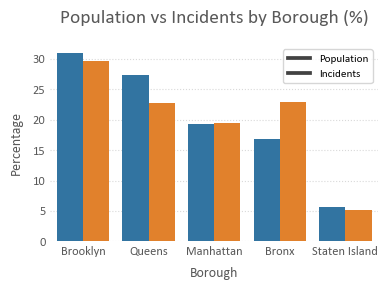

In [100]:
# Incident data: aggregate incidents by borough
incident_counts = df_analysis['Borough'].value_counts().reset_index()
incident_counts.columns = ['Borough', 'Incident_Count']

# Calculate total incidents and percentages
total_incidents = incident_counts['Incident_Count'].sum()
incident_counts['Incident_Percentage'] = (incident_counts['Incident_Count'] / total_incidents) * 100

# Population data: aggregate population by borough (choose a specific year, e.g., 2020)
# df_pop_latest = df_pop
# total_population = df_pop_latest['Population'].sum()
# df_pop_latest['Population_Percentage'] = (df_pop_latest['Population'] / total_population) * 100

# Get the latest population data and calculate percentages
df_pop_latest = df_pop.copy()
df_pop_latest = pd.pivot_table(df_pop_latest, index='Borough', aggfunc='sum').reset_index()
df_pop_latest = df_pop_latest[['Borough', 'Population']]
total_population = df_pop_latest['Population'].sum()
df_pop_latest['Population_Percentage'] = (df_pop_latest['Population'] / total_population) * 100

# Merge dataframes on Borough
merged_data = pd.merge(df_pop_latest, incident_counts, on='Borough', how='left').fillna(0)

# Sort merged data by Population_Percentage in descending order
merged_data = merged_data.sort_values(by='Population_Percentage', ascending=False, ignore_index=True)
merged_data = merged_data[['Borough', 'Population_Percentage', 'Incident_Percentage']]

# Reshape data for grouped bar chart
melted_data = merged_data.melt(id_vars='Borough', var_name='Metric', value_name='Percentage')

# Plot grouped bar chart with sorted boroughs
plt.figure(figsize=(4, 3))
sns.barplot(data=melted_data, x='Borough', y='Percentage', hue='Metric', palette='tab10', order=merged_data['Borough'])

# Customize the plot
plt.title('Population vs Incidents by Borough (%)')
plt.legend(labels=['Population', 'Incidents'], fontsize=8)

# Tidy layout and show the plot
plt.tight_layout()
plt.show()

### __Graph 4.5: WIP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!__

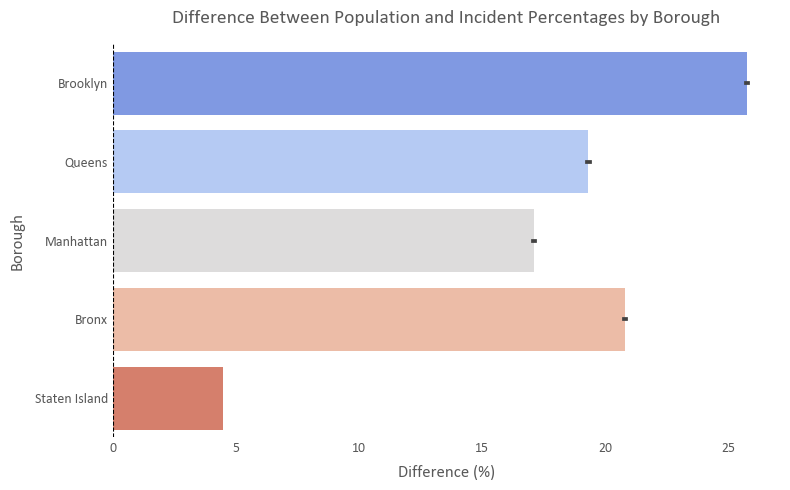

In [101]:
# Aggregate incidents by borough
incident_counts = df_analysis['Borough'].value_counts().reset_index()
incident_counts.columns = ['Borough', 'Incidents']
total_incidents = incident_counts['Incidents'].sum()
incident_counts['Incident_Percentage'] = (incident_counts['Incidents'] / total_incidents) * 100

# Get the latest population data and calculate percentages
df_pop_latest = df_pop.copy()
total_population = df_pop_latest['Population'].sum()
df_pop_latest['Population_Percentage'] = (df_pop_latest['Population'] / total_population) * 100

# Merge dataframes on Borough
merged_data = pd.merge(df_pop_latest, incident_counts, on='Borough', how='left').fillna(0)

# Calculate the difference between incident and population percentages
merged_data['Difference'] = merged_data['Incident_Percentage'] - merged_data['Population_Percentage']

# Sort boroughs by population percentage for the plot
merged_data = merged_data.sort_values(by='Population_Percentage', ascending=False)

# Plot the differences
plt.figure(figsize=(8, 5))
sns.barplot(
    data=merged_data, 
    x='Difference', 
    y='Borough', 
    palette='coolwarm', 
    orient='h'
)

# Customize the plot
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at 0%
plt.title('Difference Between Population and Incident Percentages by Borough', fontsize=14)
plt.xlabel('Difference (%)', fontsize=12)
plt.ylabel('Borough', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tidy layout and show the plot
plt.tight_layout()
plt.show()

In [102]:
incident_counts

,Borough,Incidents,Incident_Percentage
0,Brooklyn,15442,29.627782
1,Bronx,11948,22.924021
2,Queens,11846,22.728319
3,Manhattan,10176,19.524175
4,Staten Island,2708,5.195702


### __Graph 4.6:__

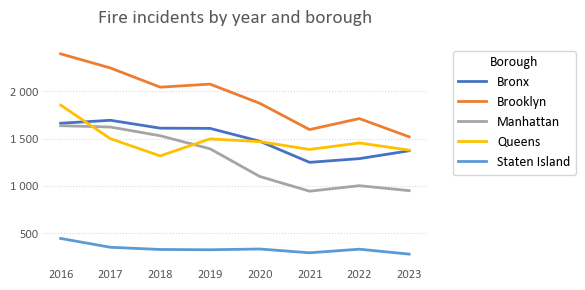

In [103]:
# Group data by 'Borough' and 'Year', then count incidents
grouped_counts = df_analysis.groupby(['Borough', 'Year']).size().unstack(fill_value=0)

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 3))  # Adjust size for better readability

# Plot a line for each borough
for borough in grouped_counts.index:
    ax.plot(
        grouped_counts.columns,  # Years as x-axis
        grouped_counts.loc[borough],  # Incident counts as y-axis for the borough
        label=borough,  # Label each line with the borough
        linewidth=2  # Adjust line width
    )

# Title and labels
ax.set_title('Fire incidents by year and borough')

# Format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Add legend
ax.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Tidy layout
plt.tight_layout()
plt.show()

### __Graph 4.7:__

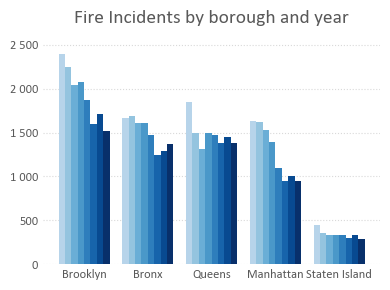

In [104]:
# Group data by 'Day period' and 'Year', then count incidents
grouped_counts = df_analysis.groupby(['Borough', 'Year']).size().unstack(fill_value=0)

# Sort by the total number of incidents across all years
grouped_counts['Total'] = grouped_counts.sum(axis=1)  # Add a 'Total' column
grouped_counts = grouped_counts.sort_values(by='Total', ascending=False).drop(columns='Total')  # Sort by total and drop 'Total'

# Set up the color map
color_map = plt.cm.Blues
start, stop = 0.3, 1.0
colors = [color_map(x) for x in np.linspace(start, stop, grouped_counts.columns.size)]

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust size for better readability
width = 0.1  # Width of each bar
x_positions = np.arange(len(grouped_counts.index))  # X-axis positions for 'Day period'

# Plot bars for each year within each day period
for i, year in enumerate(grouped_counts.columns):
    ax.bar(
        x_positions + i * width,  # Offset bars within each day period
        grouped_counts[year],  # Data for the specific year
        width=width,
        color=colors[i],
        label=str(year)  # Add year as the legend
    )

# Title, labels, and ticks
ax.set_title('Fire Incidents by borough and year')
ax.set_xticks(x_positions + width * (len(grouped_counts.columns) / 2 - 0.5))  # Center x-ticks
ax.set_xticklabels(grouped_counts.index)  # Day period labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Tidy layout
plt.tight_layout()
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()

### __Graph 4.8:__

### __Graph 4.9:__

### __Graph 4.10:__

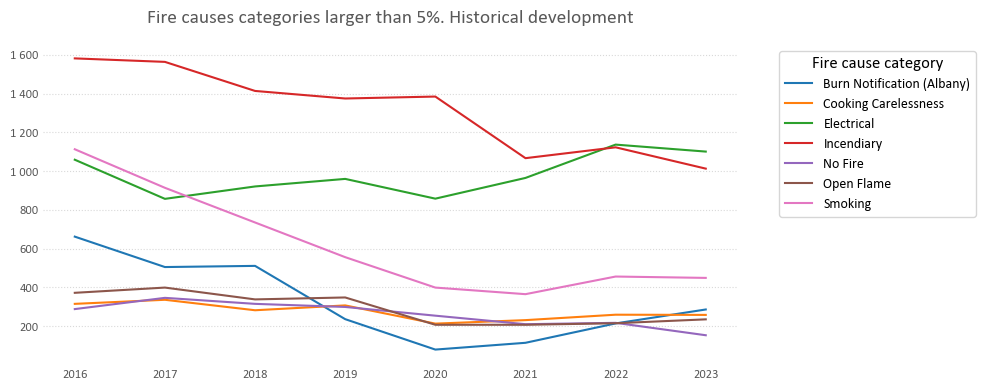

In [105]:
# Import additional library for color palettes
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex

# Step 1: Exclude 'Preliminary Investigation'
filtered_data = df_analysis[df_analysis['Fire cause category'] != 'Preliminary Investigation']

# Step 2: Count the occurrences of each 'Fire cause category'
category_counts = filtered_data['Fire cause category'].value_counts()

# Step 3: Calculate the total number of incidents
total_incidents = category_counts.sum()

# Step 4: Calculate the percentage for each category
category_percentages = (category_counts / total_incidents) * 100

# Step 5: Filter categories with 5% or higher
categories_above_5_percent = category_percentages[category_percentages >= 5].index.tolist()

# Define a custom color palette with enough distinct colors
color_palette = [to_hex(c) for c in get_cmap("tab10").colors]  # Tab10 has 10 distinct colors

# Group data by 'Fire cause' and 'Year', then count incidents
df_analysis_above5 = df_analysis[df_analysis['Fire cause category'].isin(categories_above_5_percent)].copy()

# Remove unused categories safely
df_analysis_above5['Fire cause category'] = df_analysis_above5['Fire cause category'].cat.remove_unused_categories()
grouped_counts = df_analysis_above5.groupby(['Fire cause category', 'Year']).size().unstack(fill_value=0)
    
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size for better readability

# Plot a line for each fire cause with custom line width for "Lithium Ion Battery"
for i, fire_cause in enumerate(grouped_counts.index):
    ax.plot(
        grouped_counts.columns,  # Years as x-axis
        grouped_counts.loc[fire_cause],  # Incident counts as y-axis
        label=fire_cause,  # Label each line
        linewidth=1.5,  # Standard line width
        color=color_palette[i % len(color_palette)]  # Cycle through the color palette
    )

# Title and labels
ax.set_title('Fire causes categories larger than 5%. Historical development')

# Format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Add legend
ax.legend(title='Fire cause category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)  # Move legend outside the plot

# Tidy layout
plt.tight_layout()
plt.show()

### __Graph 4.11:__

In [106]:
# Create the pivot table with counts
pivot_table = pd.pivot_table(
    data=df_analysis,
    index='Year',                        # Rows will represent 'Year'
    columns='Fire cause category',       # Columns will represent 'Fire cause category'
    values='ID',                         # Use 'ID' to count the number of incidents
    aggfunc='count',                     # Aggregate by counting occurrences
    fill_value=0                         # Fill missing values with 0
)

# Flatten the MultiIndex columns and merge them with 'Year'
pivot_table.columns = [f"{col}" for col in pivot_table.columns]

# Calculate column totals (to sort columns by total counts)
column_totals = pivot_table.sum(axis=0)

# Sort columns by column totals in descending order
sorted_columns = column_totals.sort_values(ascending=False).index.tolist()

# Reorder the pivot table columns
pivot_table = pivot_table[sorted_columns]

# Normalize each row to calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Add a 'Total' row to represent the column totals as percentages
pivot_table_percentage.loc['Total'] = pivot_table.sum(axis=0) / pivot_table.sum().sum() * 100

# Format percentages for better readability (round to one decimal place)
pivot_table_percentage = pivot_table_percentage.round(1)

# Get the highest value in the table for scaling
max_value = pivot_table_percentage.max().max()

# Styled table with customized bars
styled_table = (
    pivot_table_percentage.style
    .bar(
        align='mid',  # Align bars in the middle for better visualization
        color='#0070C0',  # Use blue color for bars
        vmin=0, vmax=50  # Scale bars based on the highest value in the table
    )
    .format("{:.1f}%")  # Display numbers with one decimal place
    .set_table_styles([
        {"selector": "th", "props": [("padding", "5px 10px"), ("vertical-align", "middle"), ("text-align", "center")]},  # Style for headers
        {"selector": "td", "props": [("padding", "5px 10px"), ("vertical-align", "middle"), ("background-color", "white")]},  # Adjust cell padding and remove banding
        {"selector": ".bar", "props": [("height", "10px"), ("margin", "5px 0")]},  # Limit bar height and add margins
    ], overwrite=True)  # Overwrite default styles to remove grey banding
)

# To view the styled table in a notebook:
styled_table

,Preliminary Investigation,Incendiary,Electrical,Smoking,Burn Notification (Albany),Open Flame,Cooking Carelessness,No Fire,Hot Objects,Appliances,Juvenile Firesetter,Motors,Other,Heaters,Ignitable,Natural Sources,Unknown,Electrical Devices
Year,,,,,,,,,,,,,,,,,,
2016,20.9%,19.8%,13.3%,13.9%,8.3%,4.7%,3.9%,3.6%,3.1%,2.6%,1.5%,1.1%,0.9%,0.8%,0.6%,0.4%,0.2%,0.2%
2017,21.2%,21.1%,11.6%,12.3%,6.8%,5.4%,4.5%,4.7%,3.5%,2.1%,1.8%,1.5%,0.8%,1.0%,0.7%,0.4%,0.4%,0.1%
2018,20.9%,20.7%,13.5%,10.8%,7.5%,5.0%,4.1%,4.6%,4.6%,2.1%,1.8%,0.9%,1.2%,1.0%,0.6%,0.4%,0.2%,0.2%
2019,26.8%,19.9%,13.9%,8.1%,3.4%,5.0%,4.5%,4.3%,4.3%,2.2%,2.1%,1.4%,1.1%,1.1%,0.7%,0.7%,0.2%,0.2%
2020,35.3%,22.2%,13.7%,6.4%,1.3%,3.3%,3.4%,4.1%,2.6%,1.6%,1.4%,1.1%,0.9%,0.7%,0.7%,0.7%,0.4%,0.1%
2021,30.3%,19.5%,17.6%,6.7%,2.1%,3.8%,4.2%,3.8%,3.4%,1.8%,2.2%,1.0%,1.1%,0.5%,0.6%,0.4%,0.7%,0.2%
2022,27.1%,19.4%,19.6%,7.9%,3.7%,3.7%,4.5%,3.7%,2.9%,1.4%,2.1%,0.7%,1.3%,0.8%,0.5%,0.5%,0.1%,0.1%
2023,25.9%,18.4%,20.0%,8.2%,5.2%,4.3%,4.7%,2.8%,3.6%,1.3%,1.8%,1.1%,0.8%,0.5%,0.6%,0.7%,0.1%,0.1%
Total,25.7%,20.2%,15.1%,9.6%,5.0%,4.5%,4.2%,4.0%,3.5%,1.9%,1.8%,1.1%,1.0%,0.8%,0.6%,0.5%,0.3%,0.2%


### __Graph 4.17:__

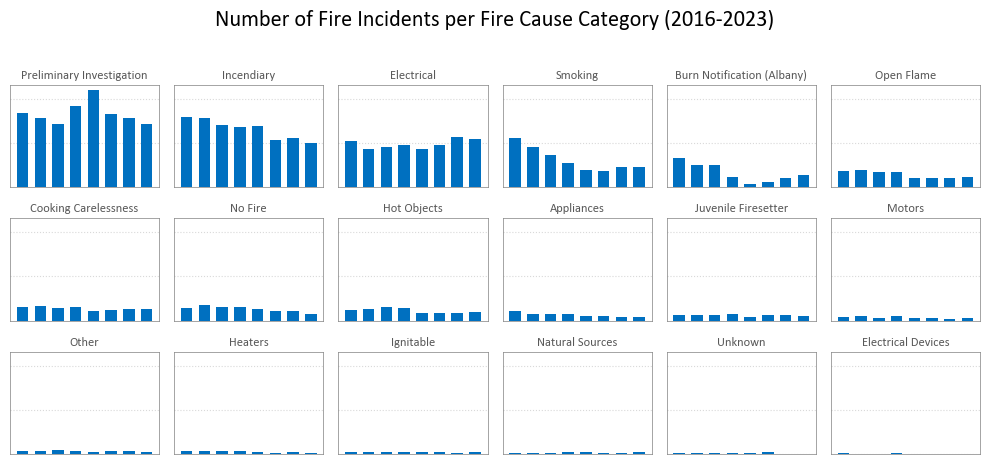

In [107]:
# Group data by 'Fire cause category' and 'Year', then count incidents
grouped_data = df_analysis.groupby(['Fire cause category', 'Year']).size().unstack(fill_value=0)

# Sort categories by total number of occurrences
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Calculate the number of rows and columns for the subplots grid
cols = 6  # Number of columns in the grid
rows = 3  # Number of rows in the grid

# Set up the figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharex=True, sharey=True)  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each category and create a bar chart
for i, category in enumerate(grouped_data.index):
    ax = axes[i]
    values = grouped_data.loc[category]
    keys = values.index
    bars = ax.bar(keys, values, color='#0070C0', width=0.65)

    # Title for each subplot
    ax.set_title(category, fontsize=9, pad=5)

    # Add gridlines
    # ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, color='gray')

    # Remove x and y axis labels but keep ticks for alignment
    ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

    # Add black border around the subplot using spines
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.5)

# Remove empty subplots if categories are fewer than total axes
for j in range(len(grouped_data.index), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Number of Fire Incidents per Fire Cause Category (2016-2023)', fontsize=16, y=0.92)

# Tidy layout
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust the rect to avoid overlap with the main title
plt.show()

### __Graph 4.18:__

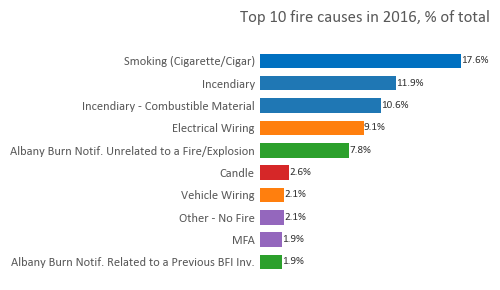

In [108]:
# Your manually defined color palette
manual_colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]

# Step 1: Filter the data
filtered_data = df_analysis[
    (df_analysis['Fire cause category'] != 'Preliminary Investigation') & 
    (df_analysis['Year'] == 2016)
]

# Step 2: Count 'Fire cause'
incident_counts = filtered_data['Fire cause'].astype(str).value_counts()

# Get top 20 fire causes
top_20_fire_causes = incident_counts.head(10)

# Extract fire causes and their counts
fire_causes = top_20_fire_causes.index.tolist()
counts = top_20_fire_causes.tolist()
counts_all = incident_counts.tolist()

# Calculate total incidents for percentage calculation
total_incidents = sum(counts_all)
percentages = [count / total_incidents * 100 for count in counts]

# Step 2: Group by Fire Cause to get the corresponding Fire Cause Categories
# Map each fire cause to its category
fire_cause_categories = df_analysis.groupby('Fire cause')['Fire cause category'].first().loc[fire_causes]

# Step 3: Map colors manually
# Get the unique fire cause categories in the same order as the fire causes
unique_categories = fire_cause_categories.unique()

# Ensure we don't exceed the color palette length
colors = manual_colors[:len(unique_categories)]

# Create a mapping from categories to colors
category_colors = dict(zip(unique_categories, colors))

# Map the colors based on the fire cause categories for the top 20 fire causes
mapped_colors = fire_cause_categories.map(category_colors)

# Step 4: Set figure size
fig, ax = plt.subplots(figsize=(5, 3))

# Step 5: Create horizontal bar chart with top 20 fire causes
bars = ax.barh(fire_causes, counts, color=mapped_colors, height=0.65)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.1f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Customize the plot
ax.set_title('Top 10 fire causes in 2016, % of total', fontsize=12, pad=15)


ax.invert_yaxis()  # Reverse the y-axis so largest values are at the top
ax.grid(False)  # Disable gridlines
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# ax.set_xlim(0, 0.2)


# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely

# Show the plot
plt.show()

### __Graph 4.19:__

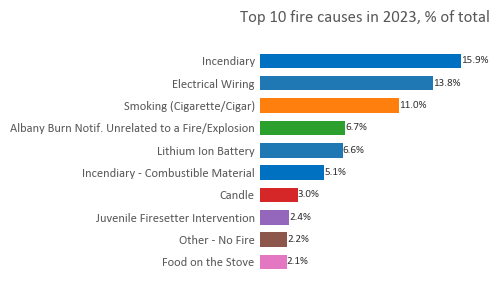

In [109]:
# Your manually defined color palette
manual_colors = [
    "#0070C0", "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728",
    "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22",
    "#17BECF", "#FFC300", "#C70039", "#900C3F", "#581845",
]

# Step 1: Filter the data
filtered_data = df_analysis[
    (df_analysis['Fire cause category'] != 'Preliminary Investigation') & 
    (df_analysis['Year'] == 2023)
]

# Step 2: Count 'Fire cause'
incident_counts = filtered_data['Fire cause'].astype(str).value_counts()

# Get top 20 fire causes
top_20_fire_causes = incident_counts.head(10)

# Extract fire causes and their counts
fire_causes = top_20_fire_causes.index.tolist()
counts = top_20_fire_causes.tolist()
counts_all = incident_counts.tolist()

# Calculate total incidents for percentage calculation
total_incidents = sum(counts_all)
percentages = [count / total_incidents * 100 for count in counts]

# Step 2: Group by Fire Cause to get the corresponding Fire Cause Categories
# Map each fire cause to its category
fire_cause_categories = df_analysis.groupby('Fire cause')['Fire cause category'].first().loc[fire_causes]

# Step 3: Map colors manually
# Get the unique fire cause categories in the same order as the fire causes
unique_categories = fire_cause_categories.unique()

# Ensure we don't exceed the color palette length
colors = manual_colors[:len(unique_categories)]

# Create a mapping from categories to colors
category_colors = dict(zip(unique_categories, colors))

# Map the colors based on the fire cause categories for the top 20 fire causes
mapped_colors = fire_cause_categories.map(category_colors)

# Step 4: Set figure size
fig, ax = plt.subplots(figsize=(5, 3))

# Step 5: Create horizontal bar chart with top 20 fire causes
bars = ax.barh(fire_causes, counts, color=mapped_colors, height=0.65)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    ax.text(
        bar.get_width() + 0.5,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Centered vertically on the bar
        f'{percentage:.1f}%',  # Format as percentage
        ha='left', va='center', fontsize=8, color='#333333'
    )

# Customize the plot
ax.set_title('Top 10 fire causes in 2023, % of total', fontsize=12, pad=15)

ax.invert_yaxis()  # Reverse the y-axis so largest values are at the top
ax.grid(False)  # Disable gridlines
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Disable x-axis ticks and labels

# Format x-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

ax.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Tidy layout
plt.tight_layout()  # Ensure everything fits nicely

# Show the plot
plt.show()

### __Graph 4.20:__

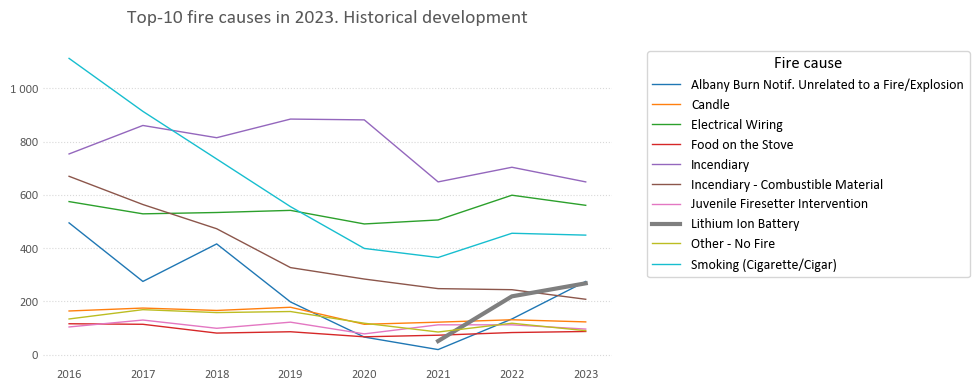

In [110]:
# Import additional library for color palettes
from matplotlib.cm import get_cmap
from matplotlib.colors import to_hex

# Define a custom color palette with enough distinct colors
color_palette = [to_hex(c) for c in get_cmap("tab10").colors]  # Tab10 has 10 distinct colors

# If you need more than 10 colors, you can use a larger colormap (e.g., "tab20" or "viridis")
if len(grouped_counts.index) > len(color_palette):
    color_palette = [to_hex(c) for c in get_cmap("tab20").colors]

# Group data by 'Fire cause' and 'Year', then count incidents
df_analysis_causes2023 = df_analysis[df_analysis['Fire cause'].isin(list(top_20_fire_causes.index))].copy()

# Remove unused categories safely
df_analysis_causes2023['Fire cause'] = df_analysis_causes2023['Fire cause'].cat.remove_unused_categories()
grouped_counts = df_analysis_causes2023.groupby(['Fire cause', 'Year']).size().unstack(fill_value=0)
    
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size for better readability

# Plot a line for each fire cause with custom line width for "Lithium Ion Battery"
for i, fire_cause in enumerate(grouped_counts.index):
    # Filter out zero values for "Lithium Ion Battery" for years 2016-2020
    if fire_cause == "Lithium Ion Battery":
        non_zero_years = grouped_counts.loc[fire_cause][grouped_counts.loc[fire_cause] > 0]  # Only non-zero values
        ax.plot(
            non_zero_years.index,  # Years with non-zero values as x-axis
            non_zero_years,  # Incident counts as y-axis
            label=fire_cause,  # Label the line
            linewidth=3,  # Thicker line
            color=color_palette[i % len(color_palette)]  # Use a consistent color
        )
    else:
        # Plot all other fire causes normally
        ax.plot(
            grouped_counts.columns,  # Years as x-axis
            grouped_counts.loc[fire_cause],  # Incident counts as y-axis
            label=fire_cause,  # Label each line
            linewidth=1,  # Standard line width
            color=color_palette[i % len(color_palette)]  # Cycle through the color palette
        )

# Title and labels
ax.set_title('Top-10 fire causes in 2023. Historical development')

# Format y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))

# Add legend
ax.legend(title='Fire cause', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)  # Move legend outside the plot

# Tidy layout
plt.tight_layout()
plt.show()

# __4. Machine learning__

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## __3.1 Regression__

### __Incendiary__

In [112]:
np.random.seed(42)

# Years 2016–2023
years_inc = np.arange(2016, 2024)

# Enforcement budget
# enf_budget = (
#     np.linspace(100, 1000, len(years_inc)) + 
#     np.random.normal(0, 5, len(years_inc))
# ).astype(int)
enf_budget = [100, 105, 120, 125, 130, 160, 165, 170]

# Number of incendiary incidents
df_analysis_inc = df_analysis[df_analysis['Fire cause category'] == 'Incendiary']
incidents_inc = df_analysis_inc.groupby('Year').size()

# Putting it into a DataFrame
data_inc = pd.DataFrame({
    "Year": years_inc,
    "Enforcement Budget (M)": enf_budget,
    "Incendiary Incidents": incidents_inc
})

# Reset the index to drop the Year index and make it a column
data_inc_reset = data_inc.reset_index(drop=True)

data_inc_reset

,Year,Enforcement Budget (M),Incendiary Incidents
0,2016,100,1582
1,2017,105,1564
2,2018,120,1414
3,2019,125,1375
4,2020,130,1385
5,2021,160,1067
6,2022,165,1123
7,2023,170,1013


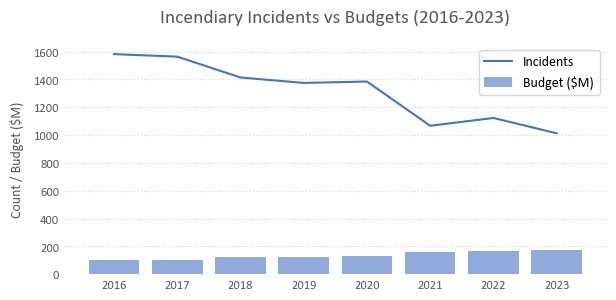

In [113]:
# Plotting New Jersey Data
plt.figure(figsize=(7, 3))
plt.plot(years_inc, incidents_inc, label='Incidents')
plt.bar(years_inc, enf_budget, alpha=0.6, label='Budget ($M)')
plt.xticks(years_inc)  # Ensures only 2010-2023 appear
plt.title("Incendiary Incidents vs Budgets (2016-2023)")
plt.ylabel("Count / Budget ($M)")
plt.legend()
plt.show()

In [114]:
data_inc_reset.corr()

,Year,Enforcement Budget (M),Incendiary Incidents
Year,1.000000,0.976907,-0.953547
Enforcement Budget (M),0.976907,1.000000,-0.989818
Incendiary Incidents,-0.953547,-0.989818,1.000000


In [115]:
X = data_inc_reset[["Enforcement Budget (M)"]]
y = data_inc_reset["Incendiary Incidents"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Results
print(f"📌 Model Evaluation Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.3f}")

📌 Model Evaluation Metrics:
🔹 Mean Squared Error (MSE): 1920.57
🔹 R² Score: 0.969


In [116]:
np.random.seed(42)

# Years 2024–2030
years_inc_2 = np.arange(2024, 2031)

# Building renovation budget
enf_budgets_ny = (
    np.linspace(170, 220, len(years_inc_2)) + 
    np.random.normal(0, 5, len(years_inc_2))
).astype(int)

# Create a DataFrame for New York budgets
enf_data_ny = pd.DataFrame({
    "Enforcement Budget (M)": enf_budgets_ny
})

# Predict using the model
predicted_incidents_ny_enf = model.predict(enf_data_ny)

# Combine results into a DataFrame
predictions_ny_enf = pd.DataFrame({
    "Year": years_inc_2,
    "Incidents": predicted_incidents_ny_enf.astype(int)
})

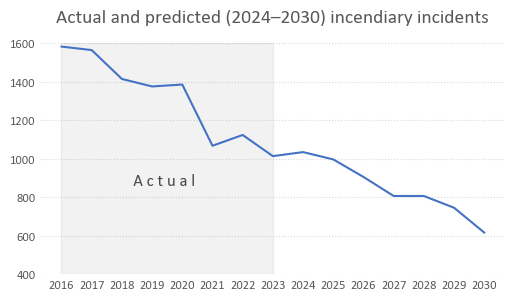

In [117]:
# Step 1: Create actual incidents DataFrame from df_analysis
df_inc = df_analysis[df_analysis["Fire cause category"] == "Incendiary"]
df_actual_inc = df_inc.groupby("Year").size().reset_index(name="Incidents")

# Step 2: Append predictions_ny DataFrame
df_combined_inc = pd.concat([df_actual_inc, predictions_ny_enf], ignore_index=True)

# Step 3: Plot
plt.figure(figsize=(6, 3))
plt.plot(df_combined_inc["Year"], df_combined_inc["Incidents"], linestyle='solid', label="Incidents")

# Step 4: Shade historic years (2016-2023)
plt.axvspan(2016, 2023, color='grey', alpha=0.1)  # Light grey background
plt.text(2018, 860, "   A c t u a l", fontsize=12, color='black', alpha=0.7)  # Label inside the grey area

# Formatting
plt.title("Actual and predicted (2024–2030) incendiary incidents")
plt.xticks(np.arange(2016, 2031), rotation=0)
plt.ylim(400, 1600)

# Show plot
plt.show()

### __Electrical__

Step1. Generate synthetic data for New Jersey (2010–2023)

In [118]:
np.random.seed(42)

# Years 2010–2023
years_nj = np.arange(2010, 2024)

# Building renovation budget
renovation_budgets_nj = (
    np.linspace(100, 200, len(years_nj)) + 
    np.random.normal(0, 5, len(years_nj))
).astype(int)

# Number of electrical incidents
incidents_nj = (
    np.linspace(1200, 600, len(years_nj)) + 
    np.random.normal(0, 20, len(years_nj))
).astype(int)

# Putting it into a DataFrame
data_nj = pd.DataFrame({
    "Year": years_nj,
    "Renovation Budget (M)": renovation_budgets_nj,
    "Electrical Incidents": incidents_nj
})

data_nj

,Year,Renovation Budget (M),Electrical Incidents
0,2010,102,1165
1,2011,107,1142
2,2012,118,1087
3,2013,130,1067
4,2014,129,997
5,2015,137,940
6,2016,154,952
7,2017,157,872
8,2018,159,832
9,2019,171,756


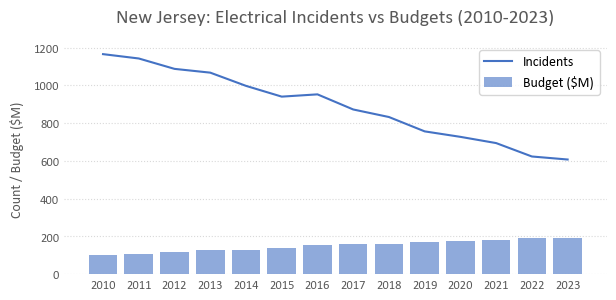

In [119]:
# Plotting New Jersey Data
plt.figure(figsize=(7, 3))
plt.plot(years_nj, incidents_nj, label='Incidents')
plt.bar(years_nj, renovation_budgets_nj, alpha=0.6, label='Budget ($M)')
plt.xticks(years_nj)  # Ensures only 2010-2023 appear
plt.title("New Jersey: Electrical Incidents vs Budgets (2010-2023)")
plt.ylabel("Count / Budget ($M)")
plt.legend()
plt.show()

Positive correlation:

In [120]:
data_nj.corr()

,Year,Renovation Budget (M),Electrical Incidents
Year,1.000000,0.991771,-0.995961
Renovation Budget (M),0.991771,1.000000,-0.984173
Electrical Incidents,-0.995961,-0.984173,1.000000


Step 2: Train a linear regression model

In [121]:
X = data_nj[["Renovation Budget (M)"]]
y = data_nj["Electrical Incidents"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Results
print(f"📌 Model Evaluation Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.3f}")

📌 Model Evaluation Metrics:
🔹 Mean Squared Error (MSE): 332.23
🔹 R² Score: 0.992


✅ Mean Squared Error (MSE): 332.23 (Low error → Good prediction accuracy)<br>
✅ R² Score: 0.992 (Very close to 1 → Model explains 99.2% of variance in fire incidents)

📢 Conclusion:
🚀 "This regression model is an excellent fit for predicting fire incidents based on budget data. With an R² of 0.992, it captures almost all the variability, meaning budget is a strong predictor of fire incidents."

Step 3: Predict incidents for New York (2024–2030) using given budgets


In [122]:
np.random.seed(42)

# Years 2024–2030
years_ny = np.arange(2024, 2031)

# Building renovation budget
renovation_budgets_ny = (
    np.linspace(130, 170, len(years_ny)) + 
    np.random.normal(0, 5, len(years_ny))
).astype(int)

# Create a DataFrame for New York budgets
data_ny = pd.DataFrame({
    "Renovation Budget (M)": renovation_budgets_ny
})

# Predict using the model
predicted_incidents_ny = model.predict(data_ny)

# Combine results into a DataFrame
predictions_ny = pd.DataFrame({
    "Year": years_ny,
    "Incidents": predicted_incidents_ny.astype(int)
})

In [123]:
data_ny

,Renovation Budget (M)
0,132
1,135
2,146
3,157
4,155
5,162
6,177


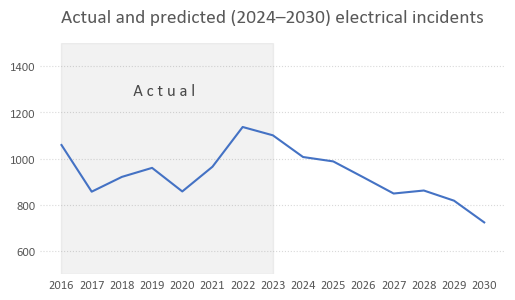

In [124]:
# Step 1: Create actual incidents DataFrame from df_analysis
df_electrical = df_analysis[df_analysis["Fire cause category"] == "Electrical"]
df_actual = df_electrical.groupby("Year").size().reset_index(name="Incidents")

# Step 2: Append predictions_ny DataFrame
df_combined = pd.concat([df_actual, predictions_ny], ignore_index=True)

# Step 3: Plot
plt.figure(figsize=(6, 3))
plt.plot(df_combined["Year"], df_combined["Incidents"], linestyle='solid', label="Incidents")

# Step 4: Shade historic years (2016-2023)
plt.axvspan(2016, 2023, color='grey', alpha=0.1)  # Light grey background
plt.text(2018, 1275, "   A c t u a l", fontsize=12, color='black', alpha=0.7)  # Label inside the grey area

# Formatting
plt.title("Actual and predicted (2024–2030) electrical incidents")
plt.xticks(np.arange(2016, 2031), rotation=0)
plt.ylim(500, 1500)

# Show plot
plt.show()

### __Smoking__

In [125]:
np.random.seed(42)

# Years 2016–2023
years_smoking = np.arange(2016, 2024)

# Smoking awareness budget
sa_budget_16_23 = [70, 73, 75, 78, 80, 78, 75, 73]

# Fire awareness budget
fa_budget_16_23 = (
    np.linspace(50, 85, len(years_smoking)) + 
    np.random.normal(0, 2.5, len(years_smoking))
).astype(int)

# Number of smoking incidents
df_analysis_inc = df_analysis[df_analysis['Fire cause category'] == 'Smoking']
incidents_smoking = df_analysis_inc.groupby('Year').size()

# Putting it into a DataFrame
data_smoking = pd.DataFrame({
    "Year": years_smoking,
    "SA Budget (M)": sa_budget_16_23,
    "FA Budget (M)": fa_budget_16_23,
    "Smoking Incidents": incidents_smoking
})

# Reset the index to drop the Year index and make it a column
data_smoking = data_smoking.reset_index(drop=True)

data_smoking

,Year,SA Budget (M),FA Budget (M),Smoking Incidents
0,2016,70,51,1113
1,2017,73,54,914
2,2018,75,61,735
3,2019,78,68,556
4,2020,80,69,399
5,2021,78,74,365
6,2022,75,83,456
7,2023,73,86,449


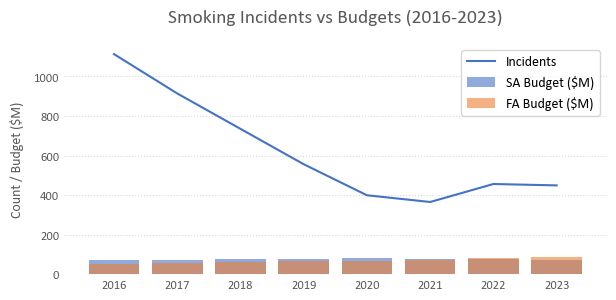

In [126]:
# Plotting Smoking Data
plt.figure(figsize=(7, 3))
plt.plot(years_smoking, incidents_smoking, label='Incidents')
plt.bar(years_smoking, sa_budget_16_23, alpha=0.6, label='SA Budget ($M)')
plt.bar(years_smoking, fa_budget_16_23, alpha=0.6, label='FA Budget ($M)')
plt.xticks(years_smoking)  # Ensures only 2016-2023 appear
plt.title("Smoking Incidents vs Budgets (2016-2023)")
plt.ylabel("Count / Budget ($M)")
plt.legend()
plt.show()

In [127]:
data_smoking.corr()

,Year,SA Budget (M),FA Budget (M),Smoking Incidents
Year,1.000000,0.372925,0.991521,-0.880638
SA Budget (M),0.372925,1.000000,0.342245,-0.765253
FA Budget (M),0.991521,0.342245,1.000000,-0.856409
Smoking Incidents,-0.880638,-0.765253,-0.856409,1.000000


In [128]:
# Define features (X) and target variable (y)
X = data_smoking[["SA Budget (M)", "FA Budget (M)"]]
y = data_smoking["Smoking Incidents"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute MSE and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print(f"📌 Model Evaluation Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 R² Score: {r2:.3f}")

📌 Model Evaluation Metrics:
🔹 Mean Squared Error (MSE): 2746.54
🔹 R² Score: 0.964


In [129]:
print(f"Model Coefficients (SA Budget, FA Budget): {model.coef_}")

Model Coefficients (SA Budget, FA Budget): [-42.24461322 -14.59165866]


📌 Model Performance<br>
R² Score: 0.964 → Great! Your model explains 96.4% of the variance in smoking-related fire incidents.<br>
MSE: 2746.54 → Indicates the average squared error, which is quite low given the scale of the incidents.<br>
📊 Feature Impact (Model Coefficients)<br>
SA Budget (M) = -42.24 → Strong negative correlation<br>
Every 1M increase in SA Budget (smoking awareness) reduces incidents by ~42.24.<br>
This confirms that SA campaigns were highly effective in reducing fire incidents!<br>
FA Budget (M) = -14.59 → Weaker negative correlation<br>
Every 1M increase in FA Budget (general fire awareness) reduces incidents by ~14.59.<br>
This means FA campaigns helped, but less effectively than SA campaigns.

In [130]:
np.random.seed(42)

# Years 2024–2030
years_smoking_24_30 = np.arange(2024, 2031)

# Smoking awareness budget 2024–2030
sa_budget_24_30 = [74, 74, 74, 74, 75, 75, 75]

# Fire awareness budget 2024–2030
fa_budget_24_30 = (
    np.linspace(85, 95, len(years_smoking_24_30)) + 
    np.random.normal(0, 2.5, len(years_smoking_24_30))
).astype(int)

# Create a DataFrame for New York budgets
safa_data_ny = pd.DataFrame({
    "SA Budget (M)": sa_budget_24_30,
    "FA Budget (M)": fa_budget_24_30
})

# Predict using the model
predicted_incidents_ny_smoking = model.predict(safa_data_ny)

# Combine results into a DataFrame
predictions_ny_smoking = pd.DataFrame({
    "Year": years_smoking_24_30,
    "Incidents": predicted_incidents_ny_smoking.astype(int)
})

In [131]:
predictions_ny_smoking

,Year,Incidents
0,2024,428
1,2025,428
2,2026,385
3,2027,326
4,2028,313
5,2029,299
6,2030,211


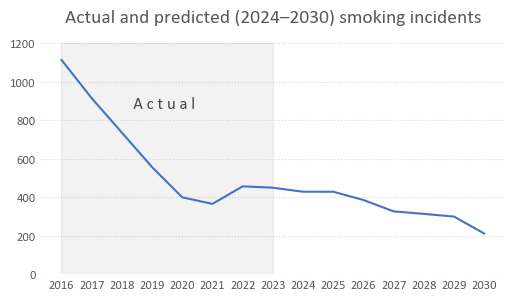

In [132]:
# Step 1: Create actual incidents DataFrame from df_analysis
df_smoking = df_analysis[df_analysis["Fire cause category"] == "Smoking"]
df_actual_smoking = df_smoking.groupby("Year").size().reset_index(name="Incidents")

# Step 2: Append predictions_ny DataFrame
df_combined_smoking = pd.concat([df_actual_smoking, predictions_ny_smoking], ignore_index=True)

# Step 3: Plot
plt.figure(figsize=(6, 3))
plt.plot(df_combined_smoking["Year"], df_combined_smoking["Incidents"], linestyle='solid', label="Incidents")

# Step 4: Shade historic years (2016-2023)
plt.axvspan(2016, 2023, color='grey', alpha=0.1)  # Light grey background
plt.text(2018, 860, "   A c t u a l", fontsize=12, color='black', alpha=0.7)  # Label inside the grey area

# Formatting
plt.title("Actual and predicted (2024–2030) smoking incidents")
plt.xticks(np.arange(2016, 2031), rotation=0)
plt.ylim(0, 1200)

# Show plot
plt.show()

### __Summary__

Add summary?

## __3.2 Classification__

### __Trying ML__

In [133]:
df_classification = df_analysis.copy()
df_classification.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


Exclude categories that lead to the same result or are unpredictable.

In [134]:
df_classification = df_classification[
    ~df_classification['Incident type category'].isin(['Burn notification', 'Investigation', 'No fire'])
]

df_classification = df_classification[
    ~df_classification['Fire cause category'].isin(['Burn Notification (Albany)', 'Preliminary Investigation', 'Unknown'])
]

In [135]:
df_classification.drop(columns=[
    'ID', 'Year & quarter', 'Date', 'Season', 'Minute',
    'Fire battalion', 'Community district', 'Police precinct',
    'Incident type', 'Fire cause'
], inplace=True)

In [136]:
df_classification.head()

,Year,Month,Day of week,Holiday,Hour,Day period,Borough,Incident type category,Fire cause category
0,2016,January,Friday,New Year,0,00:00-05:59,Queens,Residential structure,Smoking
1,2016,January,Friday,New Year,0,00:00-05:59,Staten Island,Residential structure,Incendiary
2,2016,January,Friday,New Year,0,00:00-05:59,Queens,Residential structure,Incendiary
4,2016,January,Friday,New Year,0,00:00-05:59,Queens,Residential structure,Incendiary
5,2016,January,Friday,New Year,0,00:00-05:59,Manhattan,Residential structure,Open Flame


<b><u>Encoding (Label + One-Hot)</u><br>
Label Encoding (For Tree-Based Models: RF, XGBoost, etc.)</b>

In [137]:
# Label Encode the target variable
le = LabelEncoder()
df_classification['Fire cause category'] = le.fit_transform(df_classification['Fire cause category'])

<b>One-Hot Encoding (For Linear Models: Logistic Regression, SVM, etc.)</b>

In [138]:
df_classification = pd.get_dummies(df_classification, columns=[
    'Month', 'Day of week', 'Holiday', 'Day period', 'Borough', 'Incident type category'
])

<b>Train-Test Split</b>

In [139]:
# Define features (X) and target variable (y)
X = df_classification.drop(columns=['Fire cause category'])  # Features
y = df_classification['Fire cause category']  # Target

# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Your class distribution is quite imbalanced, especially with:

* Top 2 classes (~52%)
* Bottom 5 classes (~4%)
<br><br>This means models like Logistic Regression or Decision Tree might struggle to generalize. Since we want to quickly prove that classification won’t work, let’s run a few standard models without overcompensating for imbalance (real-world data scientists would try to fix this, but we just want to show it's bad).

In [140]:
print(y.value_counts(normalize=True))

7     0.296432
2     0.221661
14    0.140426
12    0.064836
1     0.061166
5     0.051400
11    0.048239
0     0.028621
8     0.026363
9     0.016258
13    0.013662
4     0.012166
6     0.008863
10    0.007565
3     0.002343
Name: Fire cause category, dtype: float64


In [141]:
import warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Suppress warnings (optional)
warnings.filterwarnings("ignore")

# Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Handle missing values by replacing them with the column median
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Encode target labels if they are categorical
if isinstance(y_train, pd.Series) and y_train.dtype == "object":
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

# Get unique class labels
unique_classes = np.unique(y_test)
class_labels = [f"Class {cls}" for cls in unique_classes]  # Dynamic class names

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naïve Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🚀 Training {name}...\n" + "=" * 60)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {accuracy:.4f}\n")
    
    print("📊 Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    print("📉 Confusion Matrix:\n")
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert to DataFrame for readability
    conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print(conf_df)
    
    print("-" * 60)


🚀 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.3165

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.00      0.00      0.00       433
           2       0.29      0.27      0.28      1571
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        86
           5       0.00      0.00      0.00       364
           6       0.00      0.00      0.00        63
           7       0.32      0.87      0.47      2100
           8       0.00      0.00      0.00       187
           9       0.00      0.00      0.00       115
          10       0.00      0.00      0.00        54
          11       0.00      0.00      0.00       342
          12       0.00      0.00      0.00       459
          13       0.00      0.00      0.00        97
          14       0.00      0.00      0.00       995

    accuracy                     

Yeah, given these results, it's clear that our supervised learning models (Logistic Regression and Decision Tree) are performing poorly. The accuracy is low, and the classification reports show that the models struggle to correctly predict most of the fire causes.

🔍 Conclusions from Classification Models:
* Logistic Regression: 31.65% accuracy (almost random). One class (Class 7) dominates predictions.
* Decision Tree: 26.42% accuracy, slightly better recall for minority classes but still weak.
* Confusion Matrices: Most predictions are concentrated in a few classes, meaning the models fail to generalize.

### __Pivoting to frequency-based system__

In [142]:
df_classification = df_analysis.copy()
df_classification.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
3,4,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,29,00:00-05:59,Bronx,15,12,47,Burn Notification (Albany),Burn notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Burn Notification (Albany)
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary


In [143]:
# Exclude specific 'Incident type category'
exclude_incident_types = ['Burn notification', 'No fire', 'Investigation']
df_classification = df_classification[~df_classification['Incident type category'].isin(exclude_incident_types)]

# Exclude specific 'Fire cause category'
exclude_fire_causes = ['Burn Notification (Albany)', 'Preliminary Investigation', 'Unknown']
df_classification = df_classification[~df_classification['Fire cause category'].isin(exclude_fire_causes)]

# Display the cleaned dataset
df_classification.head()

,ID,Year,Year & quarter,Date,Season,Month,Day of week,Holiday,Hour,Minute,Day period,Borough,Fire battalion,Community district,Police precinct,Incident type,Incident type category,Fire cause,Fire cause category
0,1,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,8,00:00-05:59,Queens,50,8,107,MD Residential Structure,Residential structure,Smoking (Cigarette/Cigar),Smoking
1,2,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,13,00:00-05:59,Staten Island,21,2,122,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
2,3,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,21,00:00-05:59,Queens,37,5,104,MD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
4,5,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,32,00:00-05:59,Queens,50,12,103,PD Residential Structure,Residential structure,Incendiary - Combustible Material,Incendiary
5,6,2016,2016Q1,2016-01-01,Winter,January,Friday,New Year,0,46,00:00-05:59,Manhattan,9,4,14,MD Residential Structure,Residential structure,Candle,Open Flame


In [144]:
# Group by the relevant columns and count the frequency of each fire cause
fcc_frequencies = df_classification.groupby(['Day of week', 'Day period', 'Borough', 'Incident type category', 'Fire cause category']).size().reset_index(name='Frequency')

# Calculate total incidents per group at a higher level (excluding 'Fire cause category' because you want the total per group)
total_incidents = fcc_frequencies.groupby(['Day of week', 'Day period', 'Borough', 'Incident type category'])['Frequency'].transform('sum')

# Calculate the percentage
fcc_frequencies['Percentage'] = (fcc_frequencies['Frequency'] / total_incidents) * 100

# Filter out rows with frequency 0
fcc_frequencies = fcc_frequencies[fcc_frequencies['Frequency'] > 0]

fcc_frequencies.head()  # Check the first few rows

,Day of week,Day period,Borough,Incident type category,Fire cause category,Frequency,Percentage
20,Monday,00:00-05:59,Bronx,Commercial structure,Cooking Carelessness,1,7.692308
21,Monday,00:00-05:59,Bronx,Commercial structure,Electrical,5,38.461538
24,Monday,00:00-05:59,Bronx,Commercial structure,Hot Objects,1,7.692308
25,Monday,00:00-05:59,Bronx,Commercial structure,Ignitable,1,7.692308
26,Monday,00:00-05:59,Bronx,Commercial structure,Incendiary,3,23.076923


In [155]:
from IPython.display import display, HTML
from datetime import datetime
import ipywidgets as widgets

# Custom CSS for larger header and more structured output
display(HTML('''
<style>
.widget-toggle-buttons button {
    white-space: normal !important;  /* Enable multi-line text */
    line-height: 1.2em !important;   /* Adjust line spacing */
    font-family: inherit !important; /* Match font */
    box-shadow: none !important;
}

.output-text {
    font-family: inherit !important; /* Match font */
    font-size: 14px;
    margin-top: 20px;                /* Add space between widget and output */
}

.header-text {
    font-family: inherit !important;
    font-size: 22px;
    font-weight: bold;
    margin-bottom: 20px;
}

.numbered-list {
    margin-top: 8px;
    padding-left: 20px;  /* Add padding to the left */
    line-height: 1.8em;   /* Increase line spacing between items */
}

.numbered-list li {
    font-family: inherit;
    font-size: 14px;
    margin-bottom: 10px;  /* Add space between list items */
    list-style-type: none;  /* Remove bullet points */
}
</style>
'''))

# Header with emoji and title
display(HTML('<div class="header-text">🚒 FDNY Dispatch Dashboard</div>'))

# Helper function to capitalize only the first word
def capitalize_first_word(text):
    if not text:
        return ''
    return text[0].upper() + text[1:].lower()

# Get current day and day period
now = datetime.now()
current_day_of_week = now.strftime('%A')
current_hour = now.hour

# Determine day period dynamically
if 0 <= current_hour < 6:
    current_day_period = '00:00-05:59'
elif 6 <= current_hour < 12:
    current_day_period = '06:00-11:59'
elif 12 <= current_hour < 18:
    current_day_period = '12:00-17:59'
else:
    current_day_period = '18:00-23:59'

# Map Fire Cause Category to Codes
fire_code_map = {
    'Incendiary': 'A 🚓 Police response',
    'Electrical': 'B 🔧 Electrician team needed',
    'Smoking': '🚬 C - Fire team, awareness campaign',
    'Open Flame': '🔥 D - Normal response',
    'Cooking Carelessness': '🍳 E - Fire team & safety follow-up',
    'Hot Objects': '♨️ F - Fire team response',
    'No Fire': '✅ G - Lightweight response',
    'Appliances': '🔌 H - Appliance response',
    'Juvenile Firesetter': '🧒🚓 I - Police & child protection',
    'Motors': '🛠️ J - Fire team, check fuel risks',
    'Other': '🛡️ K - General team response',
    'Heaters': '🔥 L - Fire team, check heating systems',
    'Ignitable': '🧯 M - Lower priority, check ignition source',
    'Natural Sources': '🌿 N - Low priority, check risks',
    'Electrical Devices': '⚡ O - Electrical fire hazard team',
}

# Widgets
incident_type_widget = widgets.ToggleButtons(
    options=sorted(df_classification['Incident type category'].unique()),  # Sort alphabetically
    description='Location:',
    button_style='info',
    style={'button_width': '125px', 'font_weight': 'normal'}
)

borough_widget = widgets.ToggleButtons(
    options=sorted(df_classification['Borough'].unique()),  # Sort alphabetically
    description='Borough:',
    button_style='',  # Optional: 'success', 'info', 'warning', 'danger'
    style={'button_width': '80px', 'font_weight': 'normal'}
)

# Update function
def update_fire_causes(incident_type, borough):
    day_of_week = current_day_of_week
    day_period = current_day_period
    
    filtered_data = fcc_frequencies[ 
        (fcc_frequencies['Borough'] == borough) &
        (fcc_frequencies['Incident type category'] == incident_type) &
        (fcc_frequencies['Day of week'] == day_of_week) &
        (fcc_frequencies['Day period'] == day_period)
    ]
    
    top_5 = filtered_data.sort_values(by='Frequency', ascending=False).head(5)
    
    output = f"<div class='output-text'><strong>Top 5 probable fire causes for {day_of_week} during {day_period}:</strong><br>"
    for idx, row in enumerate(top_5.iterrows(), start=1):
        cause = capitalize_first_word(row[1]['Fire cause category'])
        percentage = row[1]['Percentage']
        output += f"<span class='numbered-list'>{idx}. {cause}: {percentage:.1f} %</span><br>"
    
    output += "</div>"
    
    # Print Action Code
    top_cause = top_5.iloc[0]['Fire cause category']  # Get the most probable cause
    action_code = fire_code_map.get(top_cause, "Code Unknown")
    output += f"<div class='output-text'><strong>Action code:</strong> <span style='font-weight: normal;'>{action_code}</span></div>"
    
    display(HTML(output))

# Display interactive widgets
widgets.interactive(update_fire_causes, incident_type=incident_type_widget, borough=borough_widget)

interactive(children=(ToggleButtons(button_style='info', description='Location:', options=('Commercial structu…

# __5. Conclusions / executive summary__

Here will go all the dashboards.

![Optional Alt Text](./Example.jpg)

<a href="https://ibb.co/VW0hfnH5"><img src="https://i.ibb.co/HDLM5wN3/Example.jpg"  width="400" alt="Example" border="0"></a>

![Dashboard Interaction](https://s3.gifyu.com/images/bSSHX.gif)